# Introduction:
Breast cancer is a widespread issue amongst the world. This is the most common type of cancer amongst women and is classified as either malignant which is the presence of cancerous cells that has the ability to spread throughout the body, while benign is noncancerous however abnormal build-up of cells.
The data is sourced from: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?datasetId=180&sortBy=voteCount
and can also be sourced from UCI's machine learning repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

## Importing the Necessary Libraries:

In [120]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

#Machine Learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB  
from sklearn.naive_bayes import BernoulliNB

## Reading Data and Cleaning Up Data:

One of the most important parts of data exploration and data usage is to make data usable and to make it "cleaner." The main goal of this step is to load in the data as well as making the data presentable and making sure it is ready to be used in machine learning algorithms as well as making sure it is ready for visualization purposes. 

In [121]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
cancer = pd.read_csv('/Users/ice50l/Downloads/breast_cancer.csv')
df = cancer.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [122]:
df.drop(['Unnamed: 32','id'], axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [123]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [124]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [125]:
# Checking statistics
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [126]:
# Checking the data types of each column
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [127]:
#Checking for any null values
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# EDA (Exploratory Data Analysis)

One of the more important steps of working with data is visualizing it to get a clear visual representation of what you're looking at and looking for. You could find a wide range of uses visuals which include looking at a correlation graph to see where each factor is correlated or a scatterplot to gauge the relationship between two variables, are they positively correlated, are they negatively correlated, or are they not correlated at all?

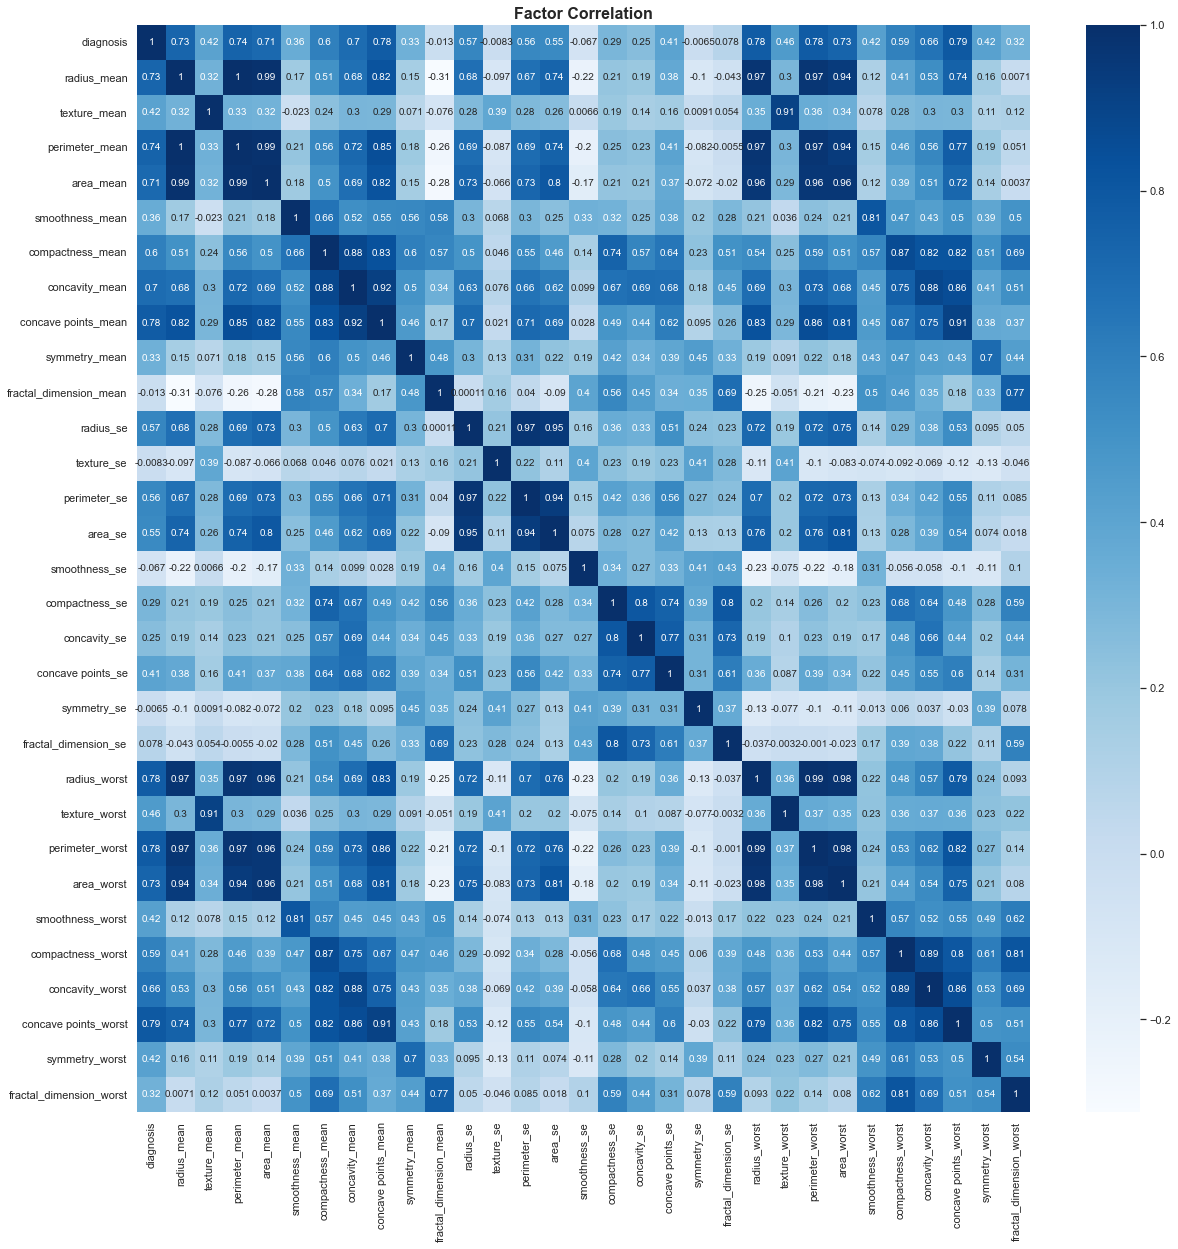

In [128]:
# Correlation between each factor
corr = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.title("Factor Correlation", fontweight = "bold", fontsize=16)
plt.show()

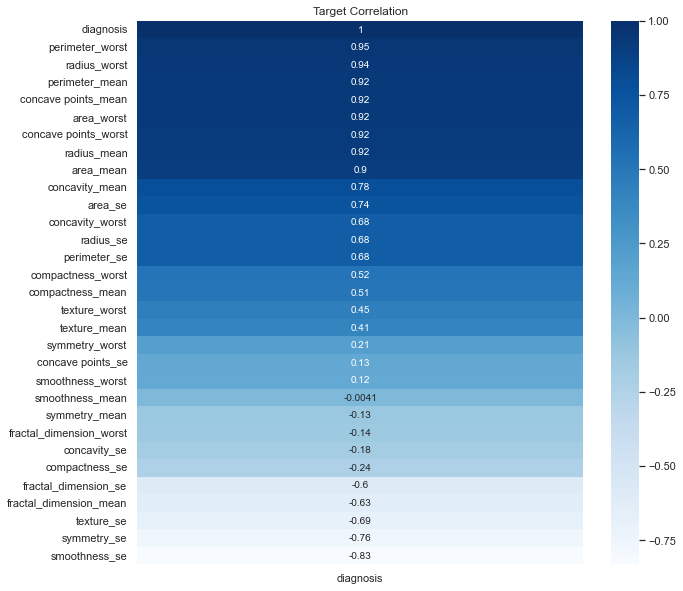

In [129]:
# Correlation for the target variable (diagnosis)
plt.figure(figsize = (10,10))
sns.heatmap(corr.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False), annot = True, cmap = 'Blues')
plt.title('Target Correlation')
plt.show()

In [130]:
# Finding which correlation in relation to the diagnosis column is above .59

corr[abs(corr['diagnosis']) > 0.59].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

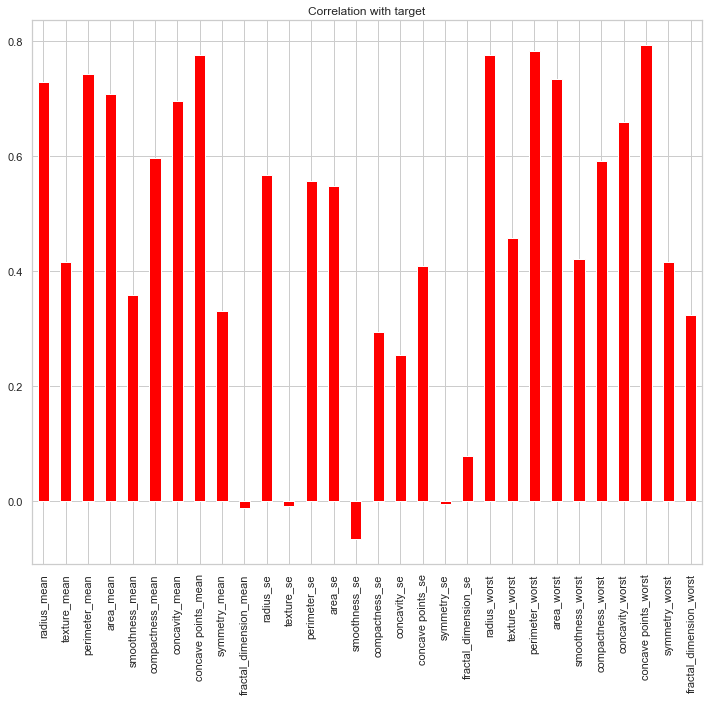

In [131]:
df.drop('diagnosis', axis=1).corrwith(df['diagnosis']).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target",color="red")
plt.show()

In [132]:
cancercop = cancer.copy()
cancercop['diagnosis'] = cancercop['diagnosis'].apply(lambda x: 'Malignant' if x == 'M' else 'Benign')
cancercop.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


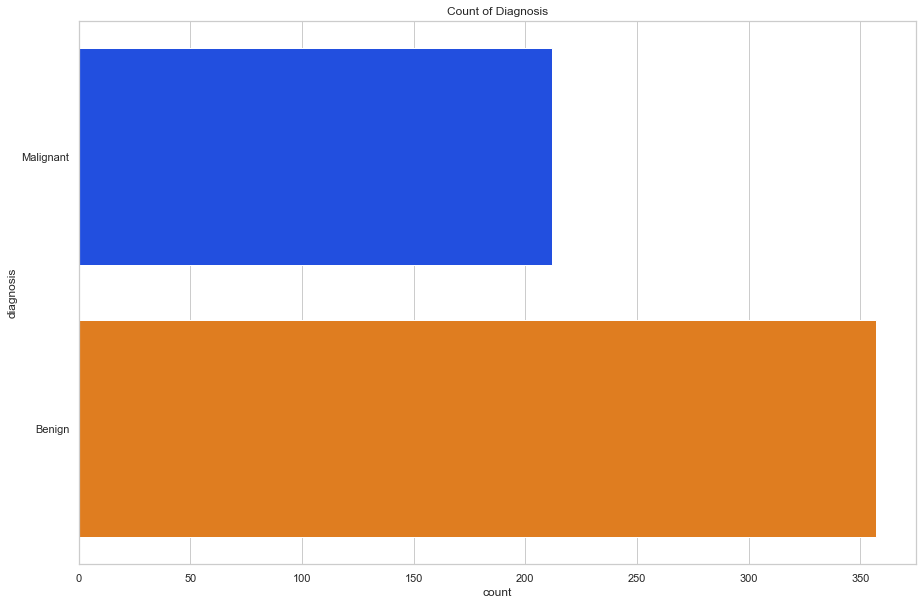

In [133]:
# Checking for the ratio between Benign and Malignant in terms of occurrence

sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (15,10))
sns.countplot(data = cancercop, 
              y = 'diagnosis', 
              palette = 'bright')
plt.title('Count of Diagnosis')
plt.show()

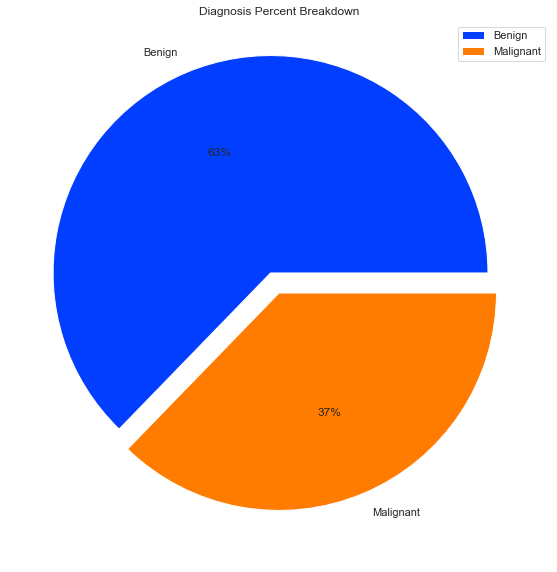

In [134]:
# Visualizing the count in terms of percent breakdown

x = cancercop['diagnosis'].value_counts().index
y = cancercop['diagnosis'].value_counts().values


explode = [0.1, 0]
colors = sns.color_palette('bright')[0:5]
plt.figure(figsize = (10,10))
plt.pie(y, 
        labels = x,
        autopct='%.0f%%',
        colors = colors,
        explode = explode
           )
plt.legend(loc = 'best')
plt.title('Diagnosis Percent Breakdown')
plt.show()

## Distribution Plot Function and Scatterplot (With Regression) Function:

These functions are made to make plotting a distribution and scatterplot easier, as the same graphs are being used over and over.

In [135]:
# Defining distribution plot function:

def plot_distribution(data, x, color):
    
    sns.displot(data = data, 
            x = x, 
            hue = color,
            kde = True,
            height = 8)
    plt.title(x)
    plt.show()

In [136]:
# Defining scatterplot correlations:

def plotscatter(data, x, y, hue):
    plt.figure(figsize = (10,10))
    sns.scatterplot(data = data, 
                x = x, 
                y = y,
                hue = hue,
                palette = 'bright'
                )

    sns.regplot(data = data,
            x = x,
            y = y,
            scatter = False,
            ci = False
            )

    plt.legend(loc = 'best')
    
    plt.title(x + ' vs ' + y)

    plt.show()

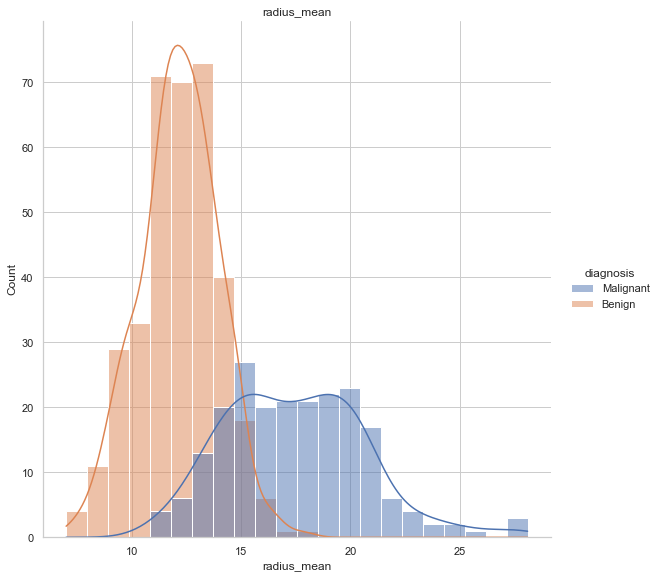

In [137]:
plot_distribution(cancercop, 'radius_mean', 'diagnosis')

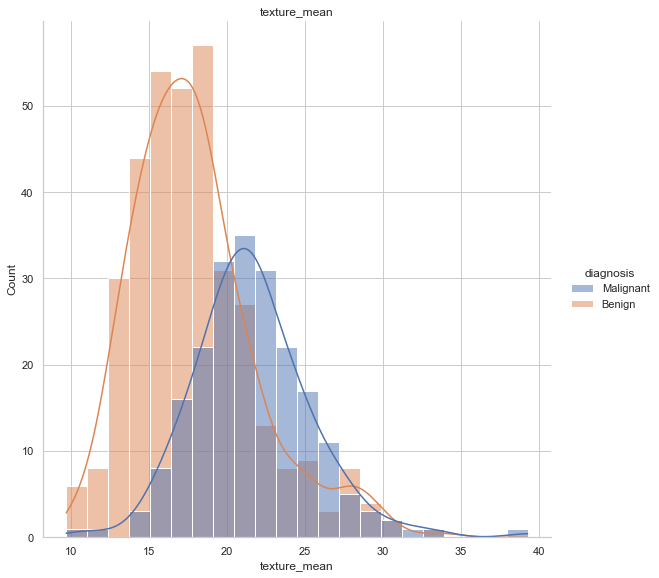

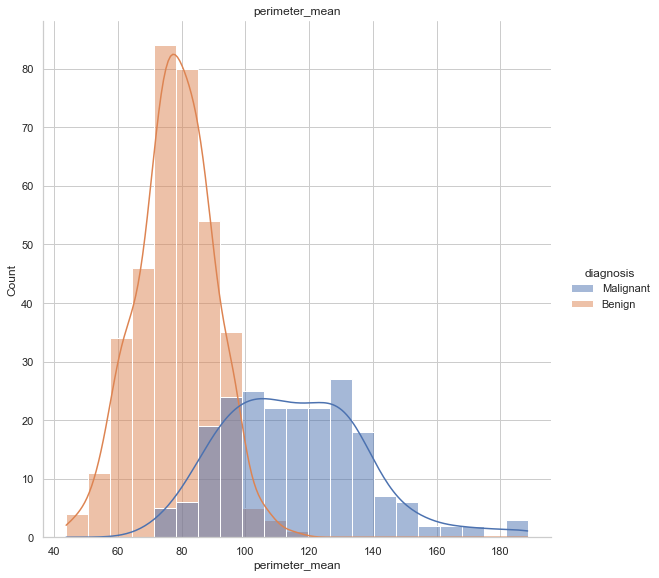

In [138]:
# Small sample of distribution plotted means
plot_distribution(cancercop, 'texture_mean', 'diagnosis')
plot_distribution(cancercop, 'perimeter_mean', 'diagnosis')


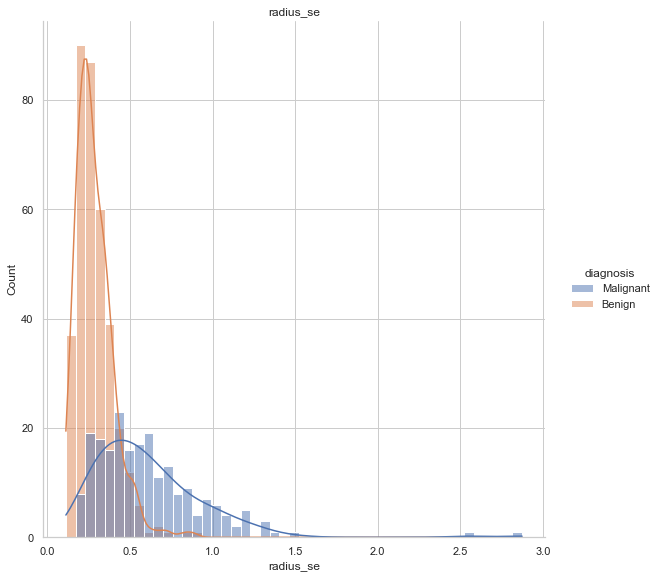

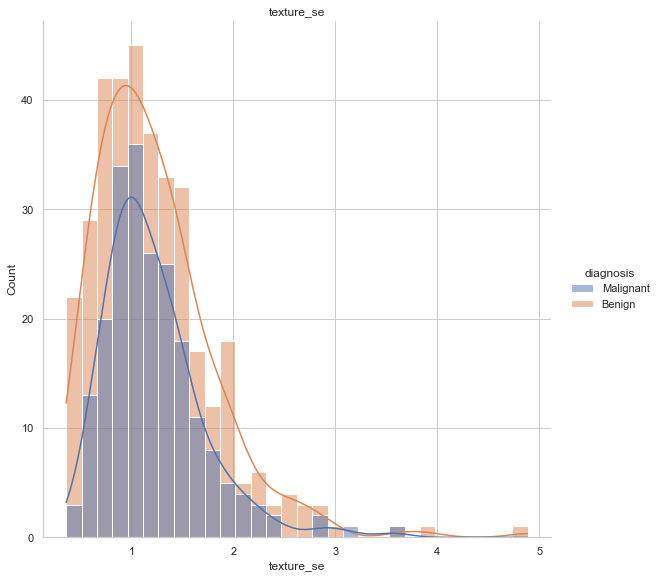

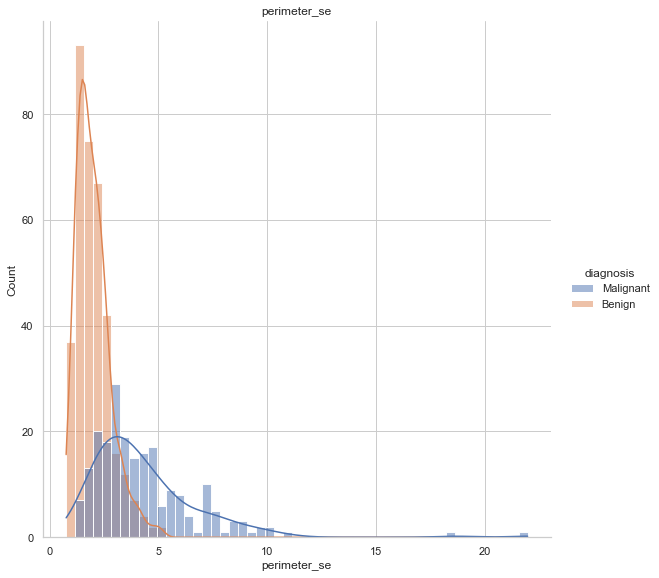

In [139]:
# Plotting 2 examples of "se" labeled columns:
plot_distribution(cancercop, 'radius_se', 'diagnosis')
plot_distribution(cancercop, 'texture_se', 'diagnosis')
plot_distribution(cancercop, 'perimeter_se', 'diagnosis')

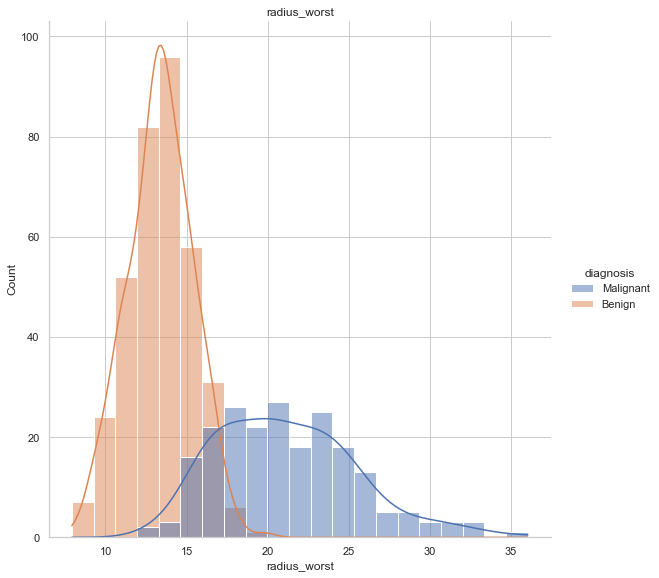

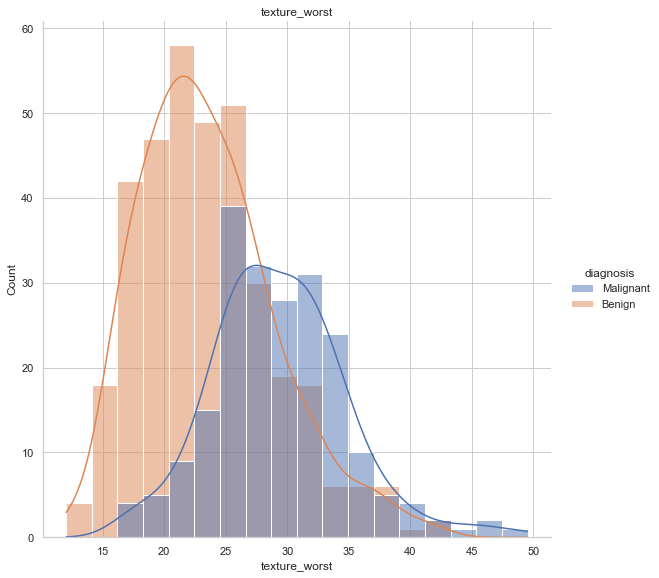

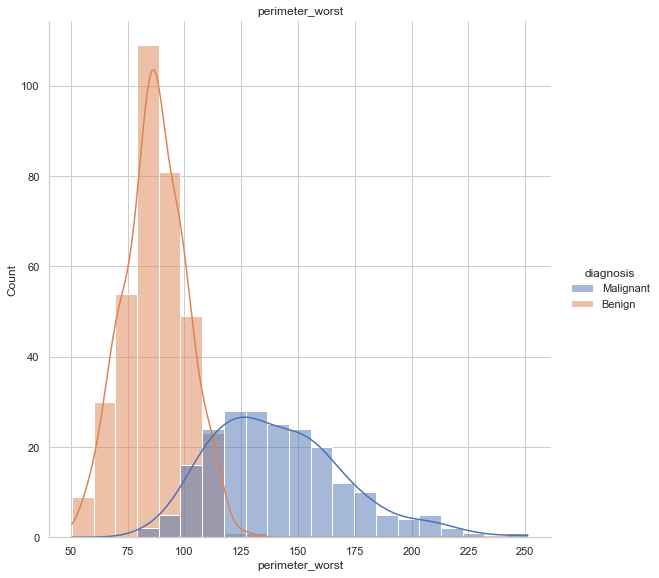

In [140]:
# Plotting columns labeled as "worst":
plot_distribution(cancercop, 'radius_worst', 'diagnosis')
plot_distribution(cancercop, 'texture_worst', 'diagnosis')
plot_distribution(cancercop, 'perimeter_worst', 'diagnosis')

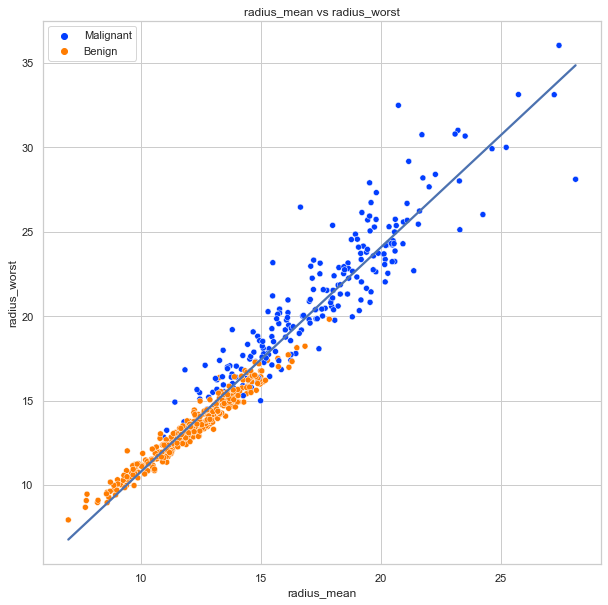

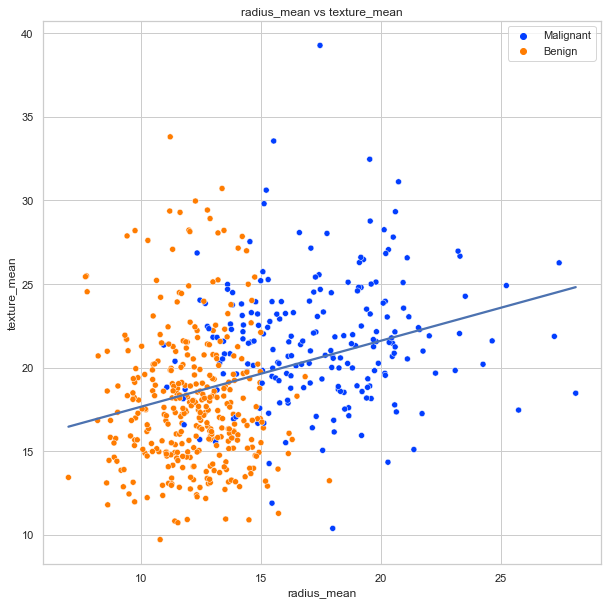

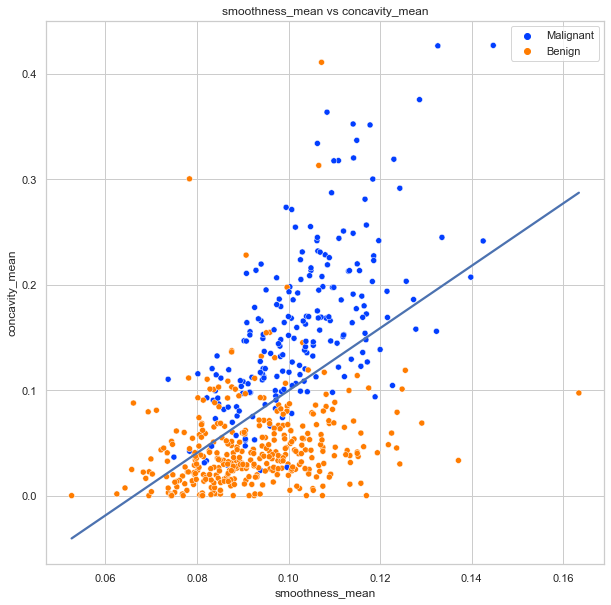

In [141]:
plotscatter(cancercop, 'radius_mean', 'radius_worst','diagnosis')
plotscatter(cancercop, 'radius_mean', 'texture_mean', 'diagnosis')
plotscatter(cancercop, 'smoothness_mean', 'concavity_mean', 'diagnosis')

In [142]:
# Reducing the dataframe based on high correlation in order to reduce the issue of multicollinearity

corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis = 1) 

print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 23 columns.


In [143]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [144]:
df.shape

(569, 23)

In [145]:
# Removing outliers so the models won't be affected by unusual data. 

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,15.70,0.12780,0.17000,0.08089,0.2087,0.07613,0.8902,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,23.75,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,19.98,0.09463,0.10900,0.07400,0.1794,0.05742,0.7732,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,27.66,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [146]:
df.shape

(497, 23)

# Running Machine Learning:

This is the part where machine learning models are used in order to see which model has the highest accuracy and which model could make the best predicitons. Various machine learning algorithms were utilized for this.

In [147]:
# Labeling features
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [148]:
# Splitting data to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

In [149]:
# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Plot ROC Curve Function: 

In [150]:
from sklearn.metrics import roc_curve

def plot_roc_curve(model):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    plt.figure(figsize = (15,10))
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model + ' ROC Curve')
    plt.show()

### Plot Learning Curve Function:

In [151]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(estimator=estimator, X=X, y=y, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1, num_trainings))
    print(np.linspace(.1,1, num_trainings))
    print(train_sizes)
    print(train_scores)
    print(test_scores)

    train_scores_mean = np.mean(train_scores, axis = 1)
    print(train_scores_mean)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    plt.figure(figsize = (15,10))
    plt.grid()
    plt.title('Learning Curves')
    plt.xlabel('Training examples')
    plt.ylabel('Score')

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = .1, color = 'g')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = .1, color = 'r')

    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'g', label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'y', label = 'Cross-validation score')
    plt.legend(loc = 'best')
    plt.show()
    
    

### Plot Confusion Matrix Function:

In [152]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model):

    plt.figure(figsize = (15,10))
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt = 'g')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(model + ' Confusion Matrix')

## Logistic Regression: 

In [222]:
lr = LogisticRegression(max_iter = 2000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_MSE = mean_squared_error(y_pred,y_test)

print(f'The Training Accuracy Score is: {accuracy_score(y_train, lr.predict(X_train))}')
print(f'The Testing Accuracy Score is: {accuracy_score(y_test, lr.predict(X_test))}')
lr_score = lr.score(X_test, y_test)
print('Score:', lr_score)
print('MSE: ', lr_MSE)



The Training Accuracy Score is: 0.9827089337175793
The Testing Accuracy Score is: 0.98
Score: 0.98
MSE:  0.02


Text(0.5, 0, 'Importance Score')

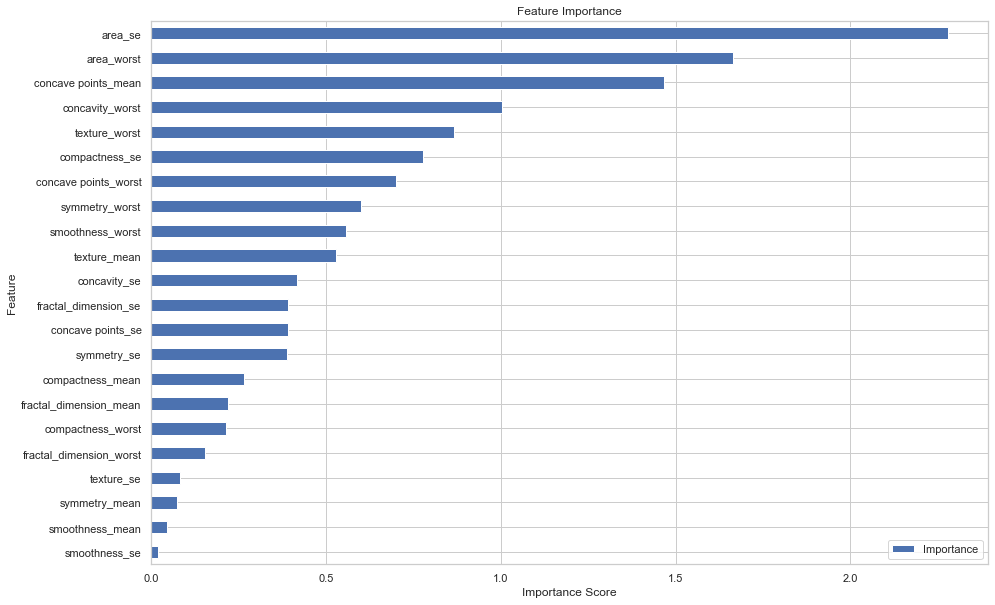

In [253]:
coefficients = lr.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15, 10))
plt.title('Feature Importance')
plt.xlabel('Importance Score')

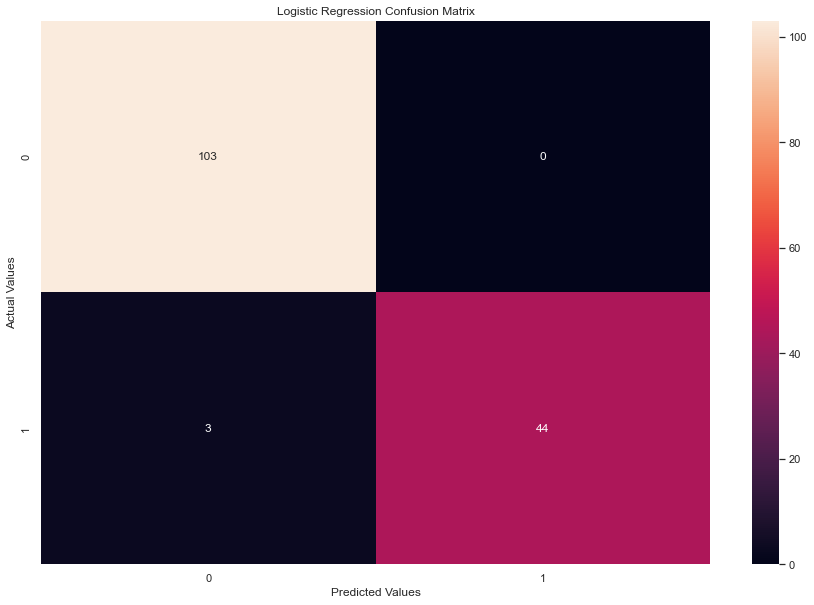

In [154]:
plot_confusion_matrix('Logistic Regression')

In [155]:
y_pred_probs = lr.predict_proba(X_test)[:,1]
print(y_pred_probs[0])

0.06694844831057671


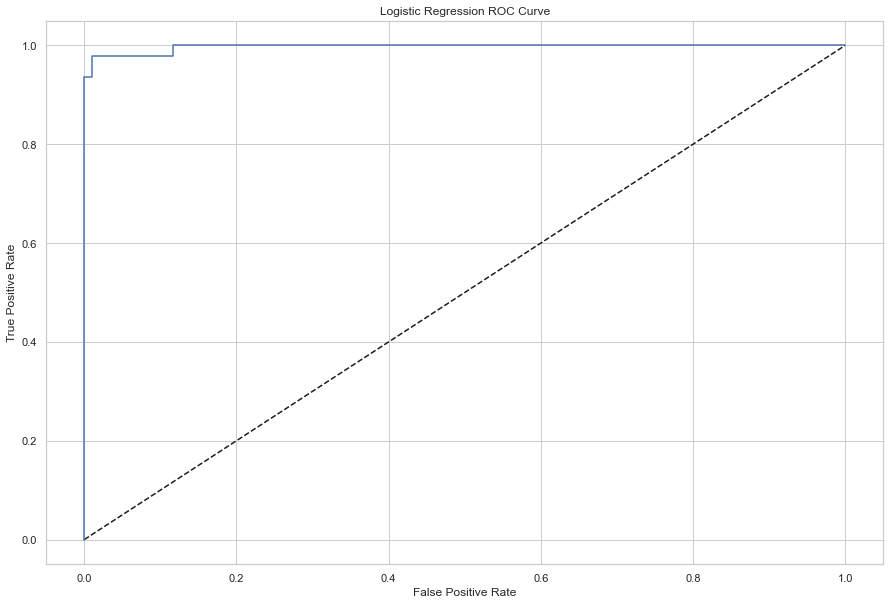

In [156]:
plot_roc_curve('Logistic Regression')

In [157]:
from sklearn.metrics import roc_auc_score
print('The AUC Score is:',roc_auc_score(y_test, y_pred_probs))

The AUC Score is: 0.9971080355298493


[0.1   0.325 0.55  0.775 1.   ]
[ 39 129 218 307 397]
[[1.         1.         1.         1.         1.        ]
 [0.96899225 0.96124031 0.95348837 0.95348837 0.95348837]
 [0.9587156  0.9587156  0.94495413 0.95412844 0.9587156 ]
 [0.95765472 0.95439739 0.94788274 0.96091205 0.96091205]
 [0.95969773 0.95465995 0.94962217 0.95465995 0.95214106]]
[[0.89       0.79       0.88888889 0.70707071 0.72727273]
 [0.91       0.97       0.94949495 0.8989899  0.87878788]
 [0.91       0.98       0.97979798 0.93939394 0.93939394]
 [0.92       0.94       0.96969697 0.94949495 0.93939394]
 [0.92       0.94       0.95959596 0.93939394 0.95959596]]
[1.         0.95813953 0.95504587 0.95635179 0.95415617]


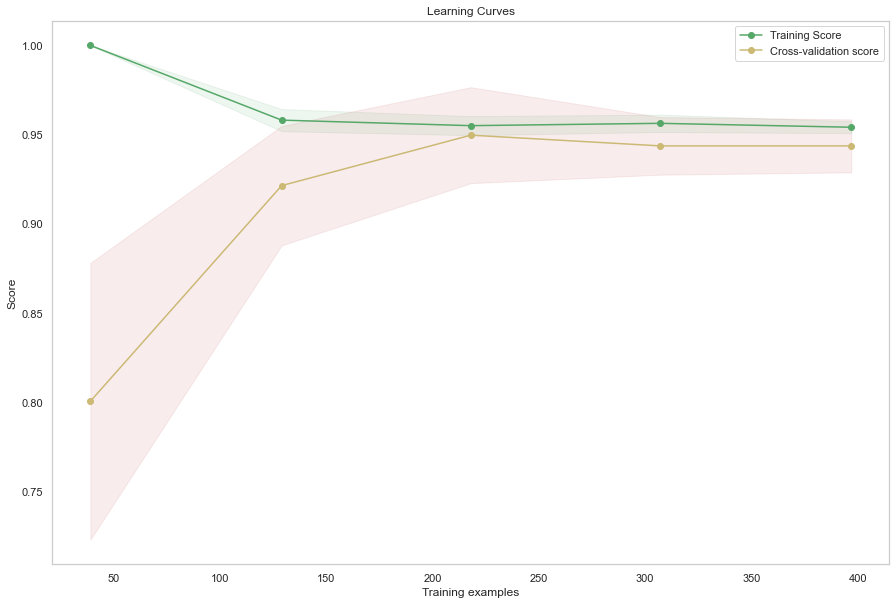

In [158]:
plot_learning_curve(X, y, lr, 5)


In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       103
           1       1.00      0.94      0.97        47

    accuracy                           0.98       150
   macro avg       0.99      0.97      0.98       150
weighted avg       0.98      0.98      0.98       150



## K Nearest Neighbors:

In [160]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_MSE = mean_squared_error(y_pred,y_test)

print(f'The Training Accuracy Score is: {accuracy_score(y_train, knn.predict(X_train))}')
print(f'The Testing Accuracy Score is: {accuracy_score(y_test, knn.predict(X_test))}')
knn_score = knn.score(X_test, y_test)
print('Score:', knn_score)
print('MSE:', knn_MSE)

The Training Accuracy Score is: 0.9596541786743515
The Testing Accuracy Score is: 0.9533333333333334
Score: 0.9533333333333334
MSE: 0.04666666666666667


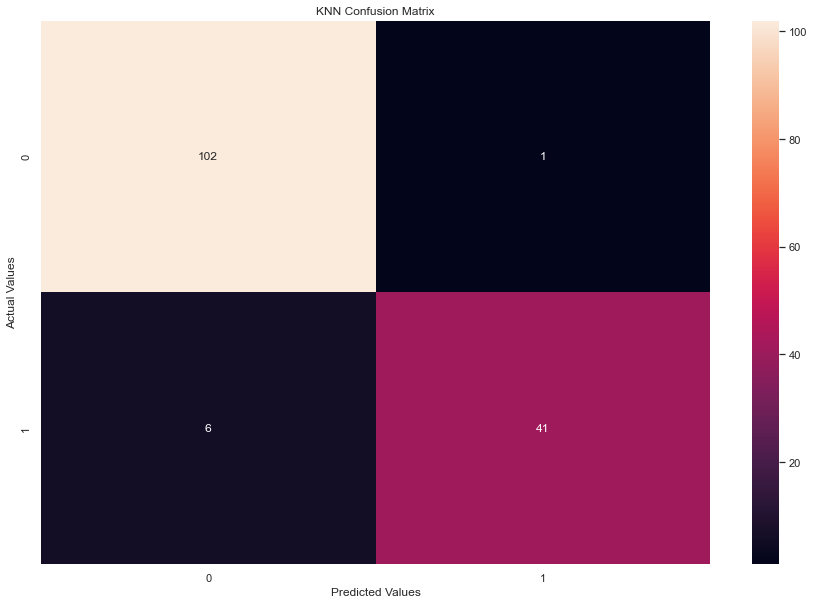

In [161]:
plot_confusion_matrix('KNN')

In [162]:
y_pred_probs = knn.predict_proba(X_test)[:,1]
print('The y Prediciton Prob is:', y_pred_probs[0])
print('The AUC Score is:',roc_auc_score(y_test, y_pred_probs))

The y Prediciton Prob is: 0.2
The AUC Score is: 0.9795496798182193


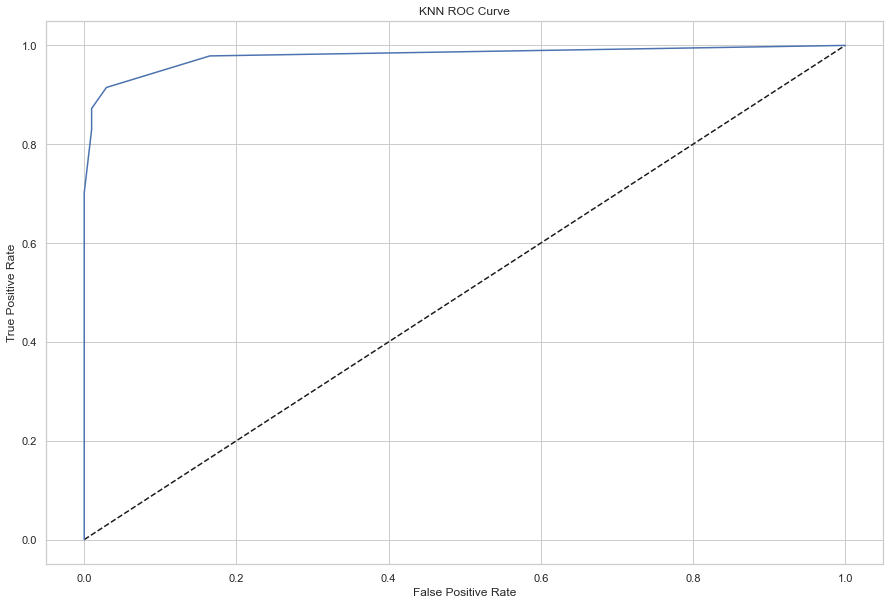

In [163]:
plot_roc_curve('KNN')

[0.1   0.325 0.55  0.775 1.   ]
[ 39 129 218 307 397]
[[0.94871795 0.94871795 0.94871795 0.94871795 0.94871795]
 [0.9379845  0.9379845  0.9379845  0.9379845  0.9379845 ]
 [0.94954128 0.93577982 0.9266055  0.9266055  0.9266055 ]
 [0.95114007 0.93811075 0.93485342 0.93159609 0.93485342]
 [0.95214106 0.94962217 0.94962217 0.93702771 0.93450882]]
[[0.85       0.83       0.84848485 0.77777778 0.77777778]
 [0.85       0.88       0.88888889 0.86868687 0.86868687]
 [0.83       0.89       0.86868687 0.87878788 0.84848485]
 [0.84       0.89       0.8989899  0.92929293 0.90909091]
 [0.87       0.91       0.93939394 0.93939394 0.92929293]]
[0.94871795 0.9379845  0.93302752 0.93811075 0.94458438]


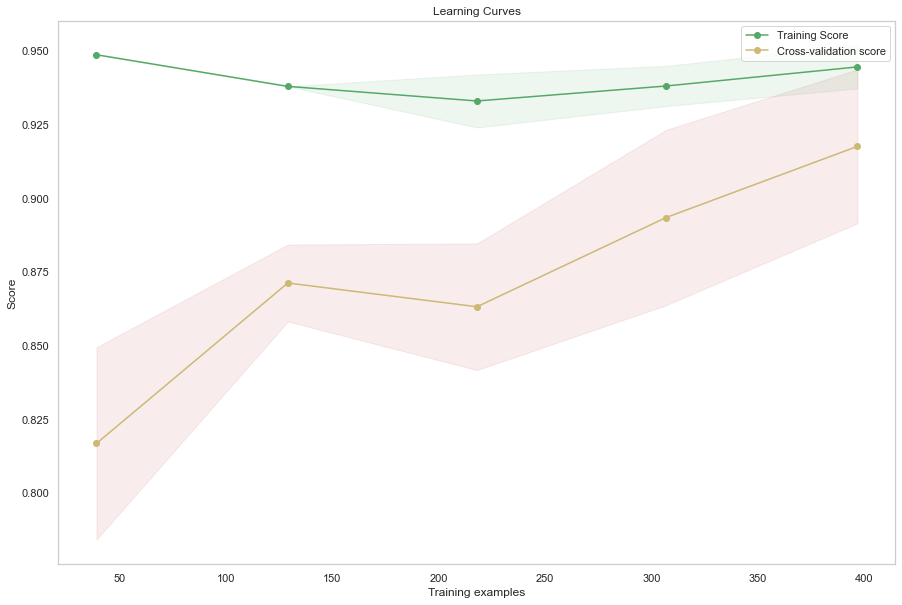

In [164]:
plot_learning_curve(X, y, knn, 5)

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       103
           1       0.98      0.87      0.92        47

    accuracy                           0.95       150
   macro avg       0.96      0.93      0.94       150
weighted avg       0.95      0.95      0.95       150



## SGD (Stochastic Gradient Descent):

In [166]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_MSE = mean_squared_error(y_pred,y_test)
print(f'The Training Accuracy Score is: {accuracy_score(y_train, sgd.predict(X_train))}')
print(f'The Testing Accuracy Score is: {accuracy_score(y_test, sgd.predict(X_test))}')
sgd_score = sgd.score(X_test, y_test)
print('Score', sgd_score)
print('MSE:', sgd_MSE)

The Training Accuracy Score is: 0.9654178674351584
The Testing Accuracy Score is: 0.9666666666666667
Score 0.9666666666666667
MSE: 0.03333333333333333


Text(0.5, 0, 'Importance Score')

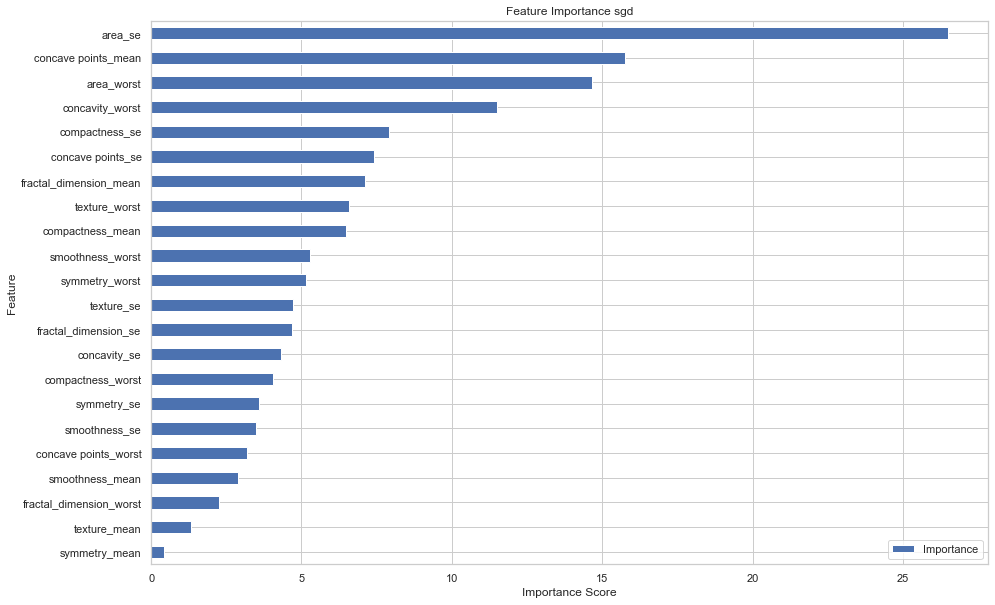

In [252]:
# Checking Feature Importance for sgd.

coefficients = sgd.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15, 10))
plt.title('Feature Importance sgd')
plt.xlabel('Importance Score')

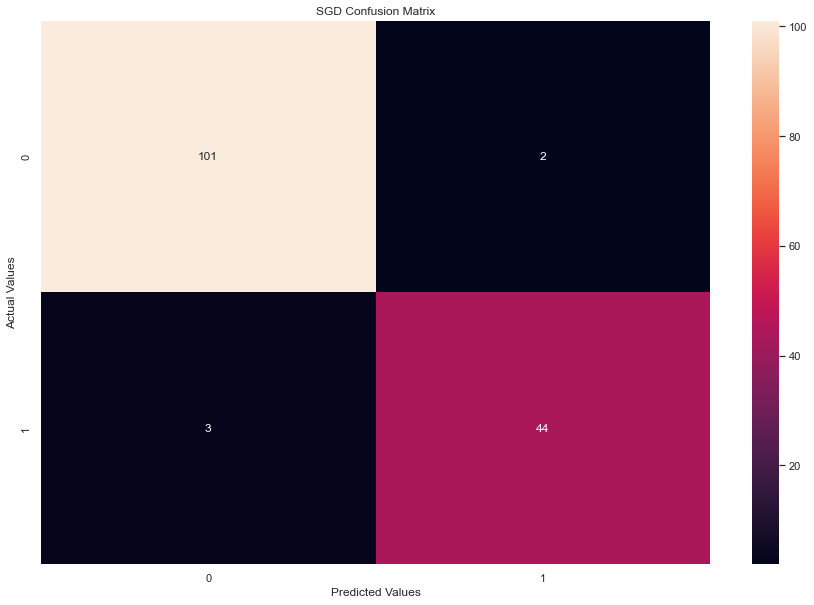

In [167]:
plot_confusion_matrix('SGD')

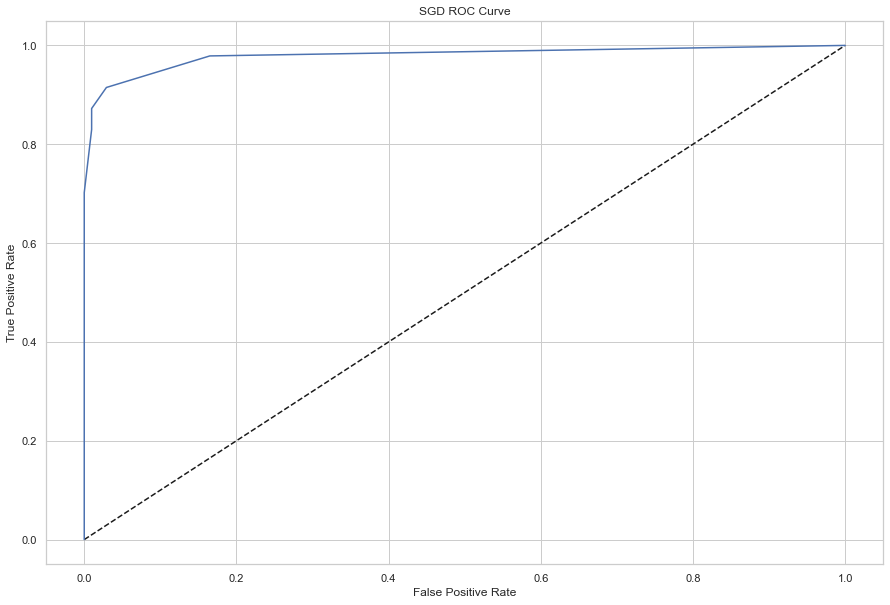

In [168]:
plot_roc_curve('SGD')

[0.1   0.325 0.55  0.775 1.   ]
[ 39 129 218 307 397]
[[0.12820513 0.84615385 0.84615385 0.84615385 0.84615385]
 [0.75968992 0.49612403 0.54263566 0.51162791 0.54263566]
 [0.50917431 0.82110092 0.78440367 0.61926606 0.55963303]
 [0.81433225 0.66123779 0.63843648 0.40716612 0.81758958]
 [0.85642317 0.82115869 0.79093199 0.41309824 0.62468514]]
[[0.67       0.33       0.33333333 0.33333333 0.33333333]
 [0.79       0.33       0.36363636 0.66666667 0.41414141]
 [0.42       0.79       0.76767677 0.5959596  0.52525253]
 [0.78       0.69       0.66666667 0.39393939 0.82828283]
 [0.77       0.79       0.7979798  0.43434343 0.63636364]]
[0.7025641  0.57054264 0.6587156  0.66775244 0.70125945]


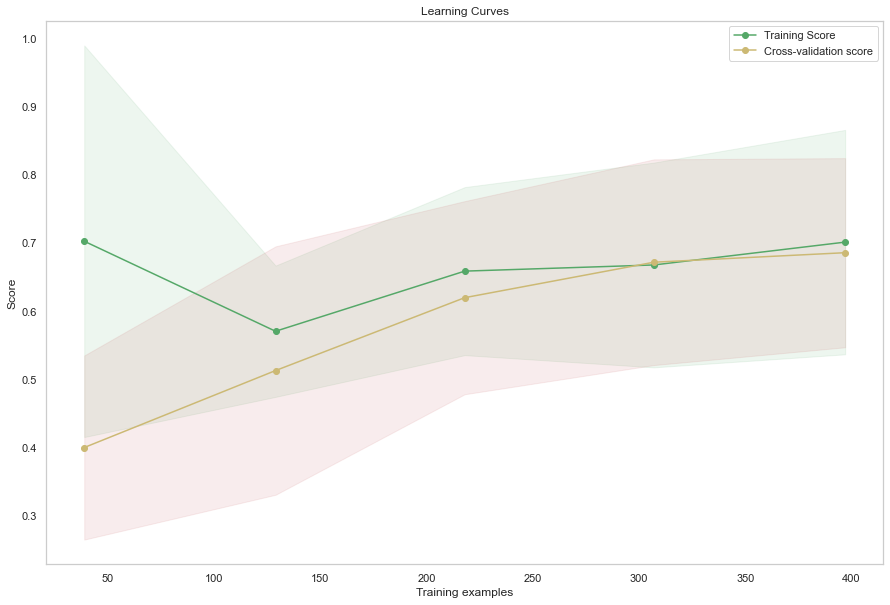

In [169]:
plot_learning_curve(X, y, sgd, 5)

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       103
           1       0.96      0.94      0.95        47

    accuracy                           0.97       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.97      0.97      0.97       150



## Decision Tree Classifier:

In [171]:
dtc = DecisionTreeClassifier()
parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}
grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [172]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'splitter': 'random'}

In [173]:
grid_search_dt.best_score_

0.9569358178053831

In [174]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 15, min_samples_leaf = 4, min_samples_split = 8, splitter = 'random')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
dtc_MSE = mean_squared_error(y_pred,y_test)
print('Training Accuraccy is:', accuracy_score(y_train, dtc.predict(X_train)))

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print('The Testing Accuracy is:', dtc_acc)
dtc_score = dtc.score(X_test, y_test)
print('Score:', dtc_score)
print('MSE:', dtc_MSE)

Training Accuraccy is: 0.968299711815562
The Testing Accuracy is: 0.94
Score: 0.94
MSE: 0.06


Text(0, 0.5, 'Features')

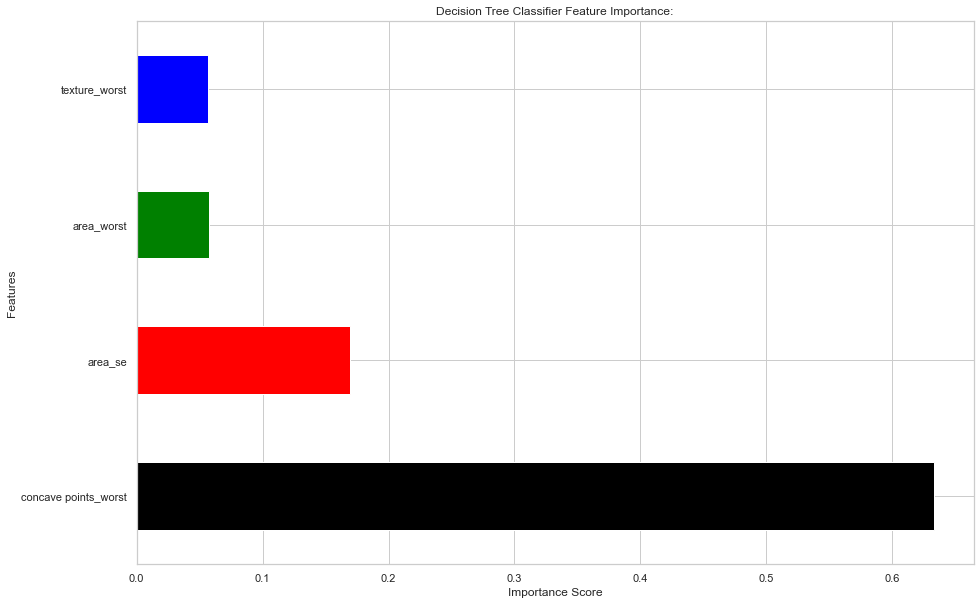

In [250]:
plt.figure(figsize = (15,10))
pd.Series(dtc.feature_importances_, index=X.columns).nlargest(4).plot(kind='barh', color = ['black', 'red', 'green', 'blue'])
plt.title('Decision Tree Classifier Feature Importance:')
plt.xlabel('Importance Score')
plt.ylabel('Features')

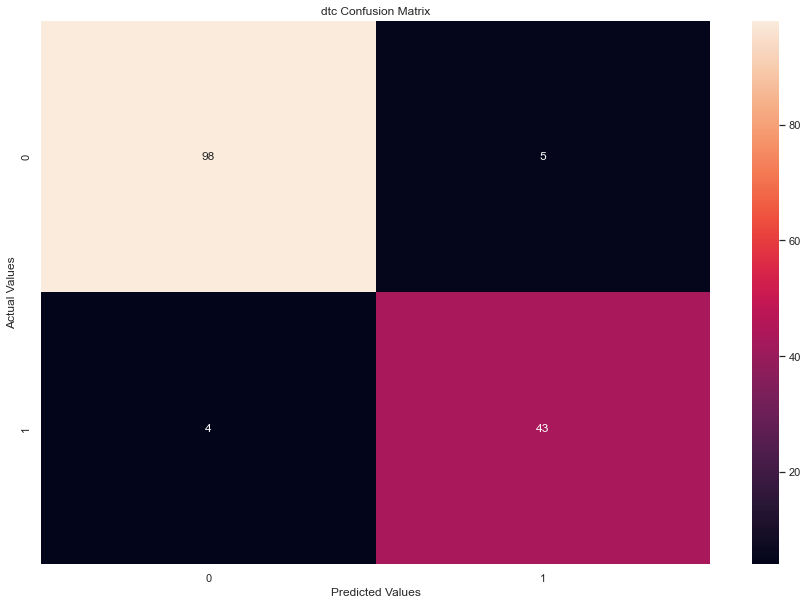

In [175]:
plot_confusion_matrix('dtc')

In [176]:
y_pred_probs = dtc.predict_proba(X_test)[:,1]
print('The AUC Score is:',roc_auc_score(y_test, y_pred_probs))

The AUC Score is: 0.9478413550919231


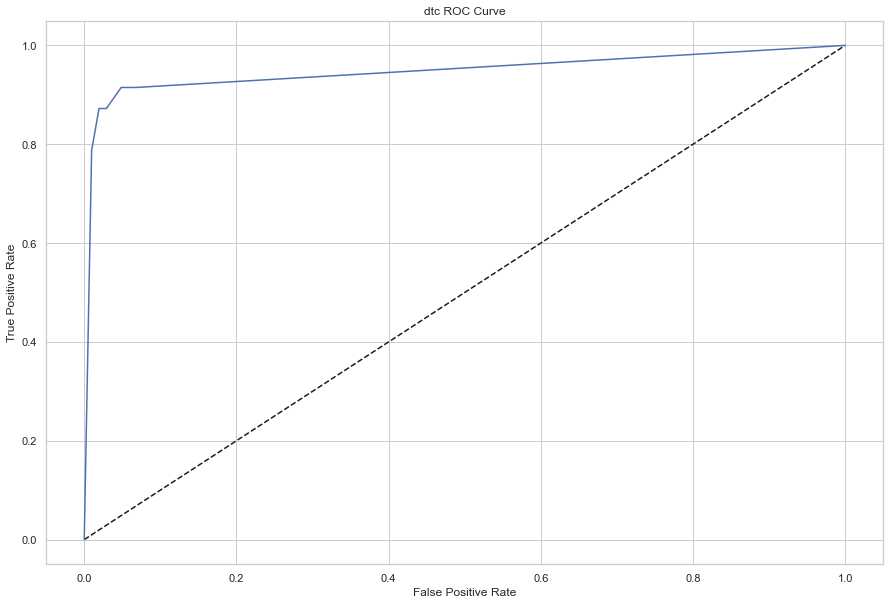

In [177]:
plot_roc_curve('dtc')

[0.1   0.325 0.55  0.775 1.   ]
[ 39 129 218 307 397]
[[0.92307692 0.97435897 0.94871795 0.97435897 0.97435897]
 [0.96124031 0.93023256 0.96899225 0.94573643 0.91472868]
 [0.95412844 0.94495413 0.96330275 0.95412844 0.96788991]
 [0.94788274 0.95765472 0.95439739 0.94788274 0.96742671]
 [0.97229219 0.95969773 0.95717884 0.96221662 0.95969773]]
[[0.5        0.8        0.64646465 0.55555556 0.63636364]
 [0.88       0.93       0.87878788 0.8989899  0.91919192]
 [0.88       0.94       0.96969697 0.90909091 0.92929293]
 [0.91       0.92       0.93939394 0.8989899  0.91919192]
 [0.86       0.97       0.96969697 0.94949495 0.93939394]]
[0.95897436 0.94418605 0.95688073 0.95504886 0.96221662]


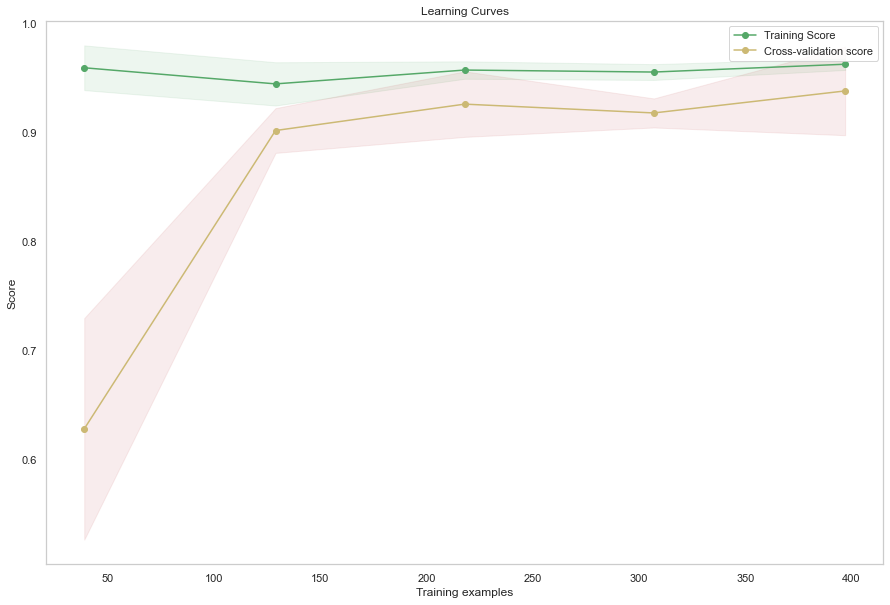

In [178]:
plot_learning_curve(X, y, dtc, 5)

In [179]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       103
           1       0.90      0.91      0.91        47

    accuracy                           0.94       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.94      0.94      0.94       150



## Random Forest Classifier:

In [180]:
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 15, min_samples_leaf = 4, min_samples_split = 8)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_MSE = mean_squared_error(y_pred,y_test)
print('Training Accuraccy is:', accuracy_score(y_train, rfc.predict(X_train)))

rfc_acc = accuracy_score(y_test, rfc.predict(X_test))
print('The Testing Accuracy is:', rfc_acc)
rfc_score = rfc.score(X_test, y_test)
print('Score:', rfc_score)
print('MSE:',rfc_MSE)

Training Accuraccy is: 0.9855907780979827
The Testing Accuracy is: 0.9733333333333334
Score: 0.9733333333333334
MSE: 0.02666666666666667


Text(0, 0.5, 'Features')

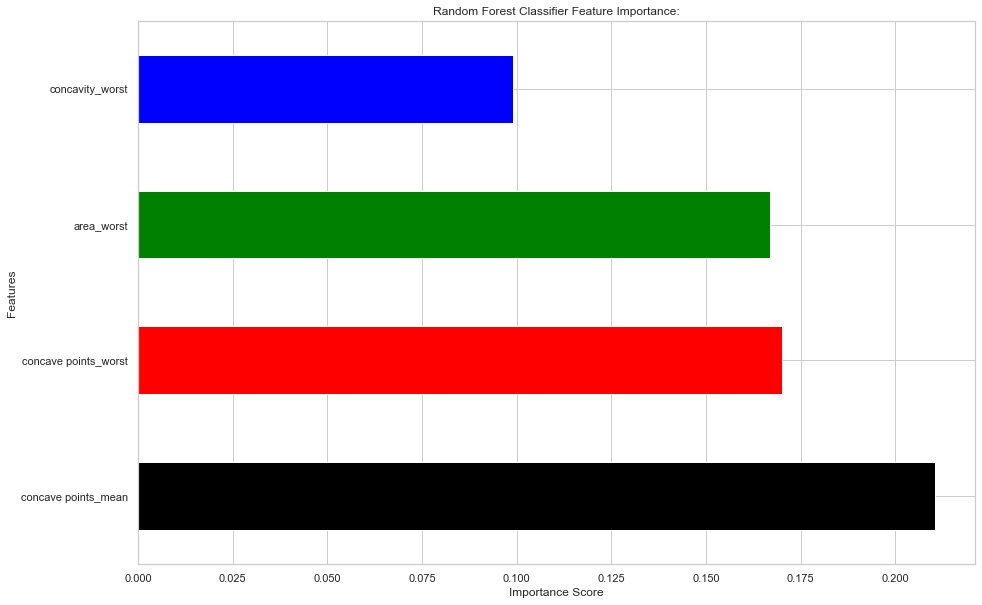

In [251]:
plt.figure(figsize = (15,10))
pd.Series(rfc.feature_importances_, index=X.columns).nlargest(4).plot(kind='barh', color = ['black', 'red', 'green', 'blue'])
plt.title('Random Forest Classifier Feature Importance:')
plt.xlabel('Importance Score')
plt.ylabel('Features')

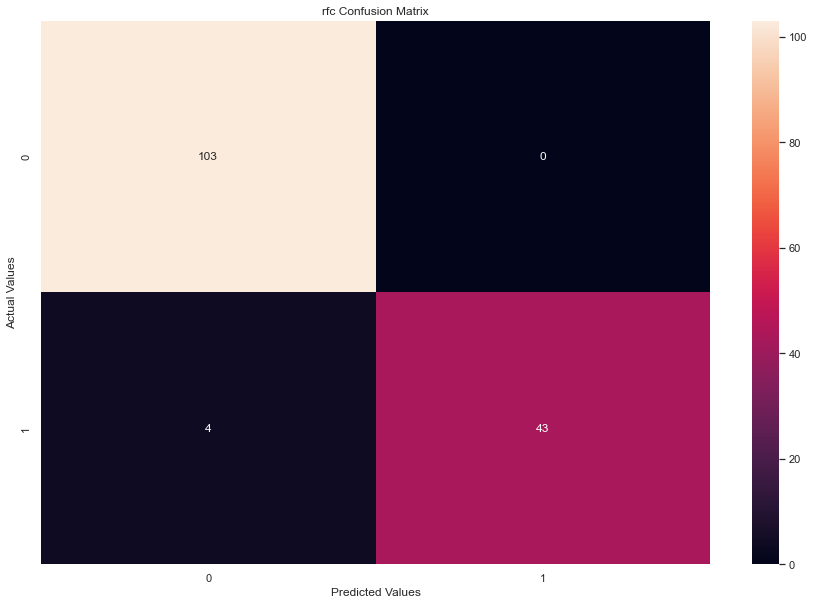

In [181]:
plot_confusion_matrix('rfc')

In [182]:
y_pred_probs = rfc.predict_proba(X_test)[:,1]
print('The y Prediciton Prob is:', y_pred_probs[0])
print('The AUC Score is:',roc_auc_score(y_test, y_pred_probs))

The y Prediciton Prob is: 0.09033369408369406
The AUC Score is: 0.9983474488741996


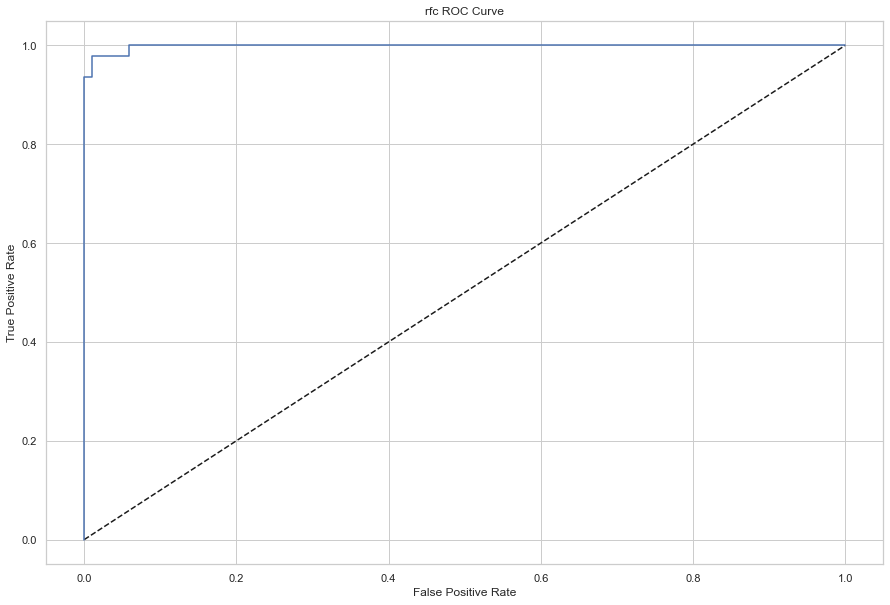

In [183]:
plot_roc_curve('rfc')

[0.1   0.325 0.55  0.775 1.   ]
[ 39 129 218 307 397]
[[1.         0.97435897 1.         0.97435897 0.97435897]
 [0.99224806 0.97674419 0.98449612 0.96899225 0.96899225]
 [0.99082569 0.98165138 0.98165138 0.98623853 0.98623853]
 [0.99022801 0.98371336 0.98697068 0.99022801 0.98697068]
 [0.99244332 0.98992443 0.97984887 0.98992443 0.98740554]]
[[0.74       0.74       0.77777778 0.66666667 0.6969697 ]
 [0.91       0.95       0.97979798 0.91919192 0.93939394]
 [0.92       0.98       0.96969697 0.92929293 0.93939394]
 [0.92       0.97       0.97979798 0.94949495 0.96969697]
 [0.92       0.96       0.97979798 0.96969697 0.94949495]]
[0.98461538 0.97829457 0.9853211  0.98762215 0.98790932]


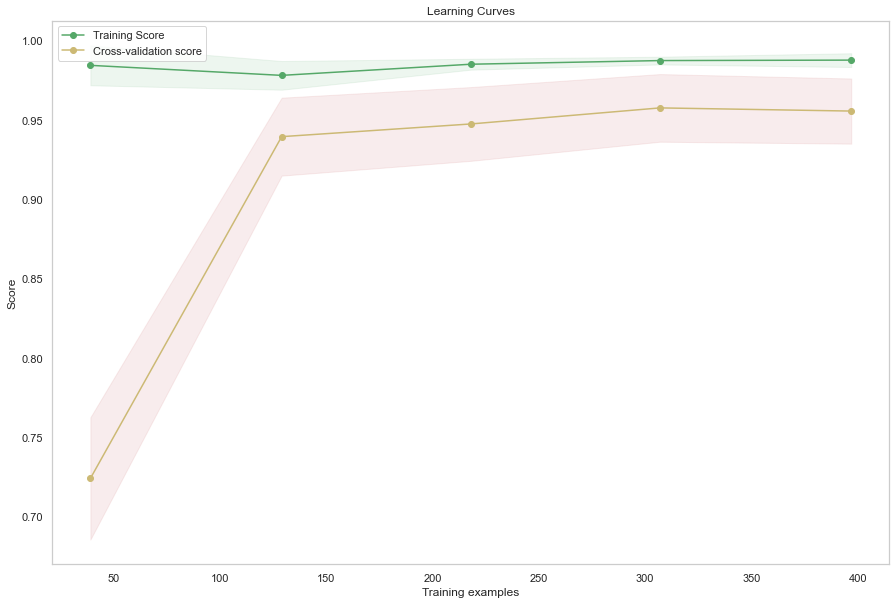

In [184]:
plot_learning_curve(X, y, rfc, 5)

In [185]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       103
           1       1.00      0.91      0.96        47

    accuracy                           0.97       150
   macro avg       0.98      0.96      0.97       150
weighted avg       0.97      0.97      0.97       150



## XG BOOST:

In [186]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 180)

xgb.fit(X_train, y_train)
print('Testing Accuracy:', accuracy_score(y_train, xgb.predict(X_train)))
y_pred = xgb.predict(X_test)
xgb_MSE = mean_squared_error(y_pred,y_test)

xgb_acc = accuracy_score(y_test, y_pred)
print('Test Score:', xgb_acc)
xgb_score = xgb.score(X_test, y_test)
print('Score:', xgb_score)
print('MSE:', xgb_MSE)

Testing Accuracy: 1.0
Test Score: 0.98
Score: 0.98
MSE: 0.02


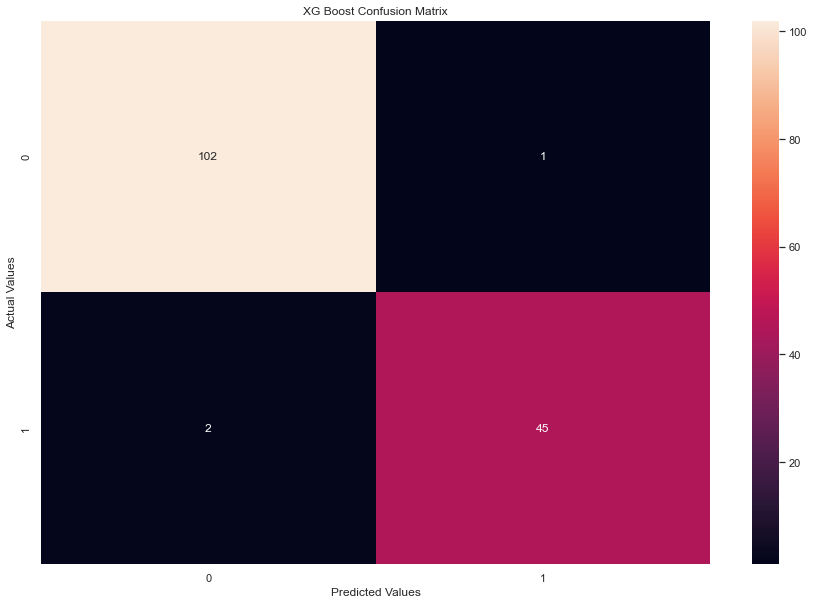

In [187]:
plot_confusion_matrix('XG Boost')

In [188]:
y_pred_probs = xgb.predict_proba(X_test)[:,1]
print('The y Prediciton Prob is:', y_pred_probs[0])
print('The AUC Score is:',roc_auc_score(y_test, y_pred_probs))

The y Prediciton Prob is: 0.04475724
The AUC Score is: 0.9940095021689733


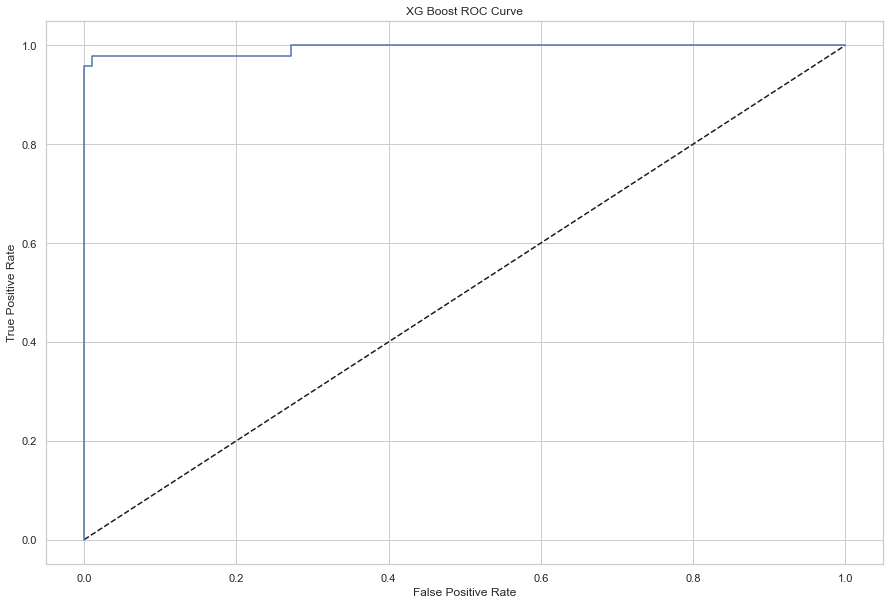

In [189]:
plot_roc_curve('XG Boost')

[0.1   0.325 0.55  0.775 1.   ]
[ 39 129 218 307 397]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0.76       0.66       0.72727273 0.50505051 0.56565657]
 [0.9        0.97       0.98989899 0.94949495 0.94949495]
 [0.92       0.97       0.98989899 0.94949495 0.94949495]
 [0.9        0.98       0.97979798 0.95959596 0.95959596]
 [0.96       0.97       1.         0.97979798 0.95959596]]
[1. 1. 1. 1. 1.]


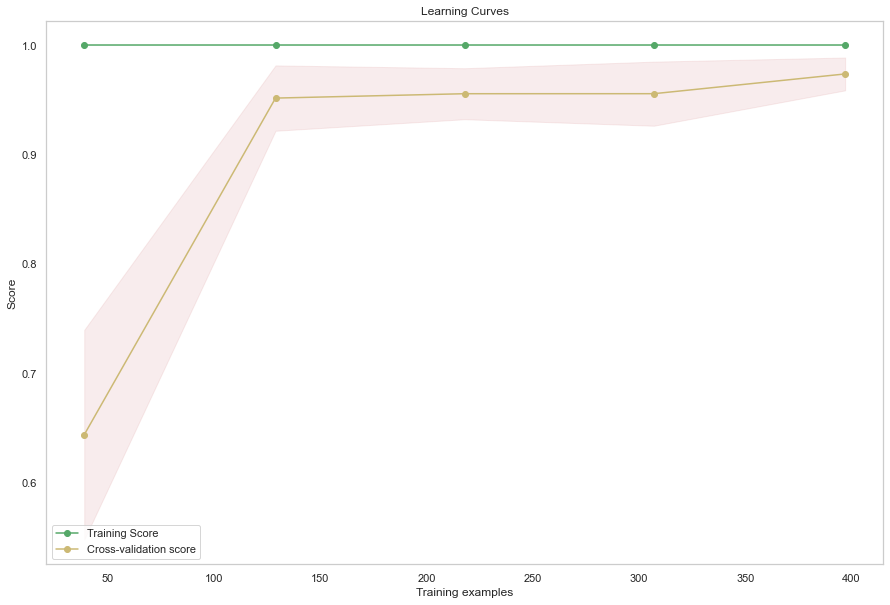

In [190]:
plot_learning_curve(X, y, xgb, 5)

## Gradient Boosting Classifier:

In [191]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [192]:
grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 180}

In [193]:
grid_search_gbc.best_score_

0.9569358178053831

In [194]:
gbc = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
gbc_MSE = mean_squared_error(y_pred,y_test)

print('Training Accuracy:', accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, y_pred)
print('Testing Accuracy:', gbc_acc)
gbc_score = gbc.score(X_test, y_test)
print('Score:', gbc_score)
print('MSE:', gbc_MSE)

Training Accuracy: 1.0
Testing Accuracy: 0.98
Score: 0.98
MSE: 0.02


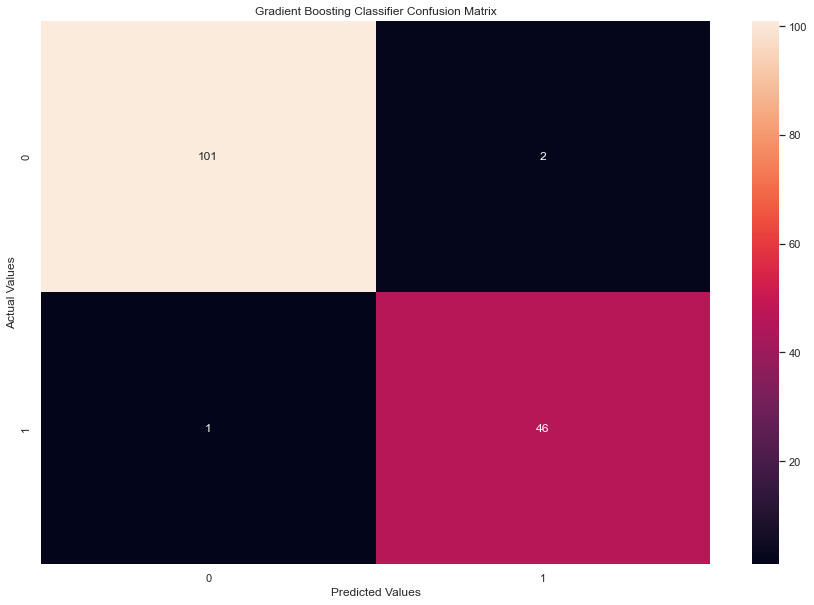

In [195]:
plot_confusion_matrix('Gradient Boosting Classifier')

In [196]:
y_pred_probs = gbc.predict_proba(X_test)[:,1]
print('The y Prediciton Prob is:', y_pred_probs[0])
print('The AUC Score is:',roc_auc_score(y_test, y_pred_probs))

The y Prediciton Prob is: 1.9553512060215612e-13
The AUC Score is: 0.9952489155133237


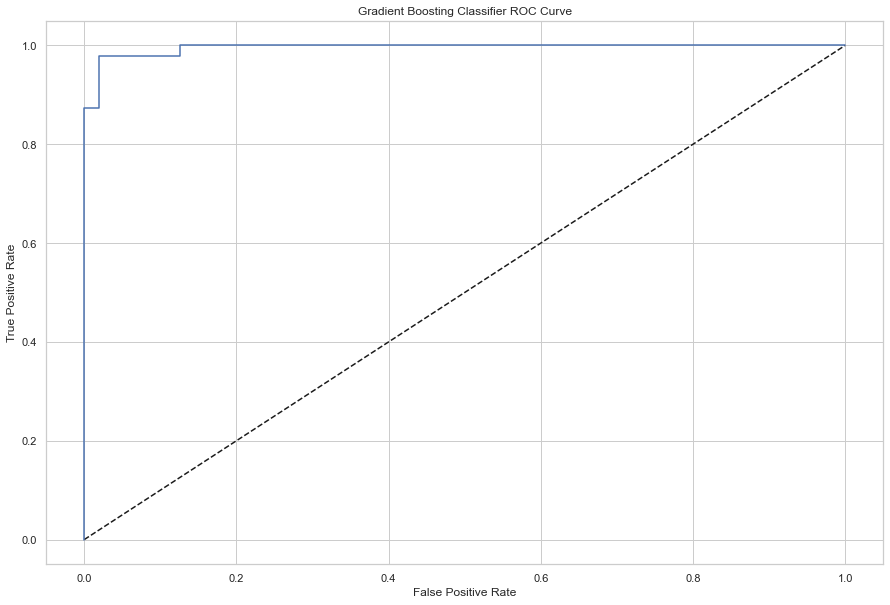

In [197]:
plot_roc_curve('Gradient Boosting Classifier')

[0.1   0.325 0.55  0.775 1.   ]
[ 39 129 218 307 397]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0.79       0.81       0.85858586 0.67676768 0.65656566]
 [0.9        0.96       0.94949495 0.8989899  0.88888889]
 [0.94       0.92       0.97979798 0.97979798 0.92929293]
 [0.93       0.95       1.         0.98989899 0.96969697]
 [0.94       0.96       0.98989899 0.95959596 0.97979798]]
[1. 1. 1. 1. 1.]


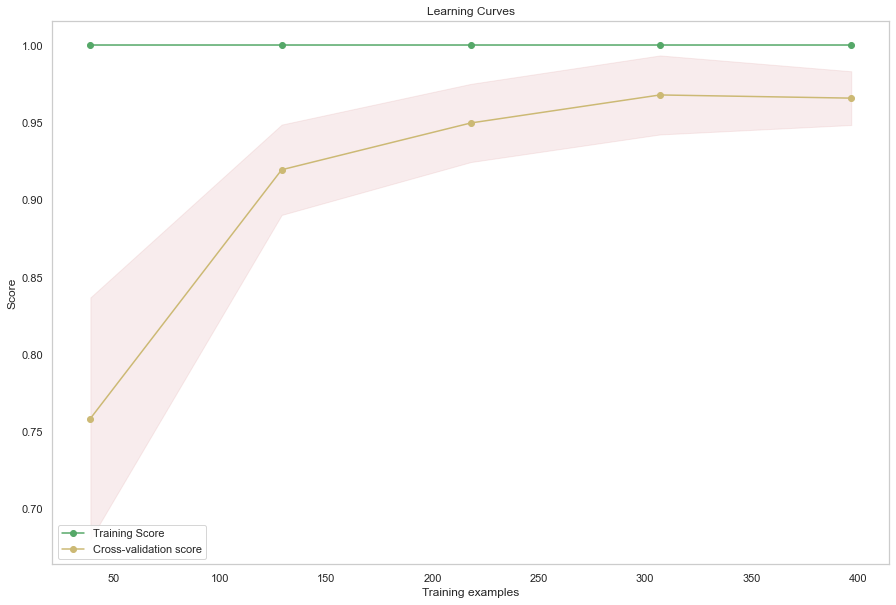

In [198]:
plot_learning_curve(X, y, gbc, 5)

In [199]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       103
           1       0.96      0.98      0.97        47

    accuracy                           0.98       150
   macro avg       0.97      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



## SVC:

In [200]:
svc = SVC()
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [201]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [202]:
grid_search.best_score_

0.9653830227743271

In [203]:
svc = SVC(C = 10, gamma = .01)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_MSE = mean_squared_error(y_pred,y_test)
print('Training Score:', accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print('Testing Accuracy:', svc_acc)

svc_score = svc.score(X_test, y_test)
print('Score:', svc_score)
print('MSE:', svc_MSE)

Training Score: 0.9827089337175793
Testing Accuracy: 0.9866666666666667
Score: 0.9866666666666667
MSE: 0.013333333333333334


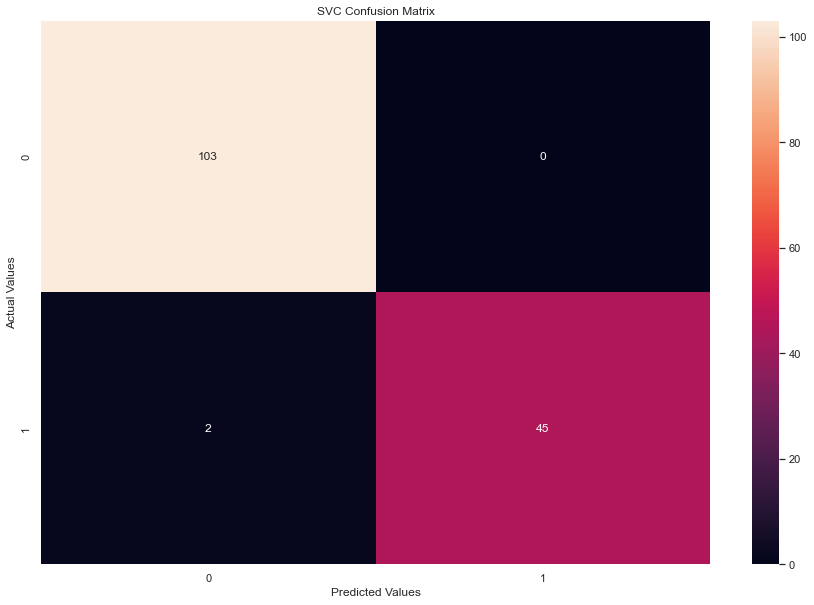

In [204]:
plot_confusion_matrix('SVC')

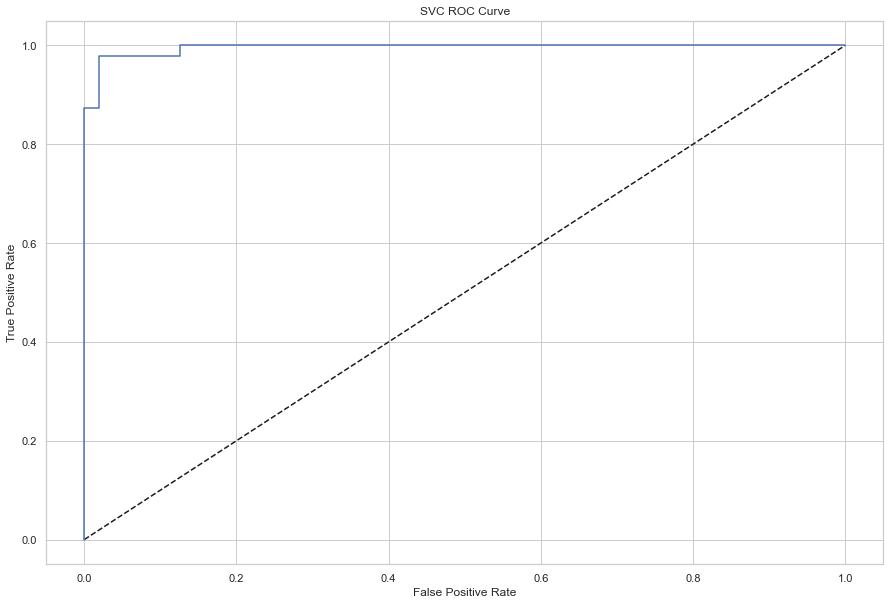

In [205]:
plot_roc_curve('SVC')

[0.1   0.325 0.55  0.775 1.   ]
[ 39 129 218 307 397]
[[1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [0.99748111 1.         0.99748111 0.99748111 1.        ]]
[[0.34       0.4        0.44444444 0.39393939 0.37373737]
 [0.72       0.8        0.84848485 0.77777778 0.77777778]
 [0.82       0.82       0.90909091 0.80808081 0.78787879]
 [0.85       0.85       0.90909091 0.85858586 0.83838384]
 [0.85       0.87       0.90909091 0.86868687 0.88888889]]
[1.         1.         1.         1.         0.99848866]


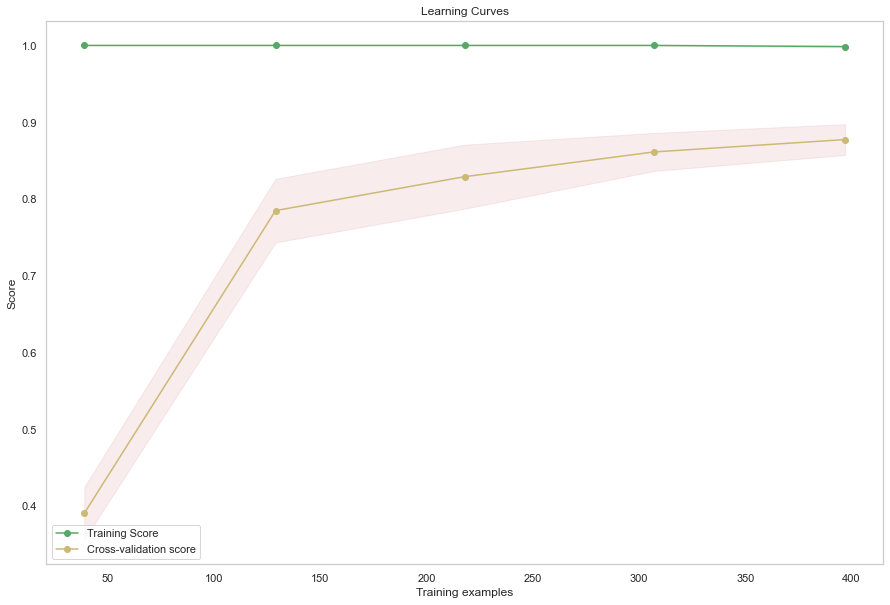

In [206]:
plot_learning_curve(X, y, svc, 5)

## Naive Bayes (Gaussian):

In [207]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)
gauss_MSE = mean_squared_error(y_pred,y_test)
print('Training Score:', accuracy_score(y_train, gauss.predict(X_train)))
gauss_acc = accuracy_score(y_test, gauss.predict(X_test))
print('Testing Accuracy:', gauss_acc)

gauss_score = gauss.score(X_test, y_test)
print('Score:', gauss_score)
print('MSE:', gauss_MSE)


Training Score: 0.9279538904899135
Testing Accuracy: 0.9333333333333333
Score: 0.9333333333333333
MSE: 0.06666666666666667


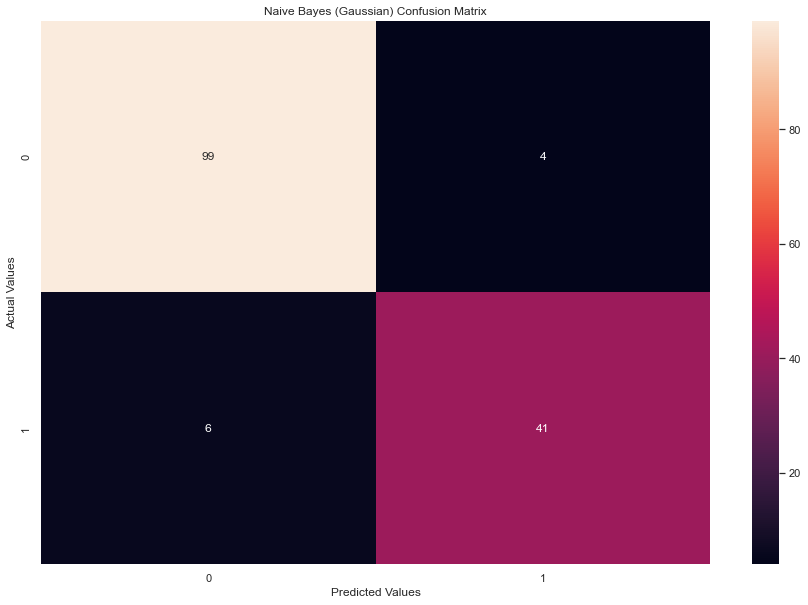

In [208]:
plot_confusion_matrix('Naive Bayes (Gaussian)')

In [209]:
y_pred_probs = gauss.predict_proba(X_test)[:,1]
print('The y Prediciton Prob is:', y_pred_probs[0])
print('The AUC Score is:',roc_auc_score(y_test, y_pred_probs))

The y Prediciton Prob is: 5.763049457140356e-07
The AUC Score is: 0.9898781243544723


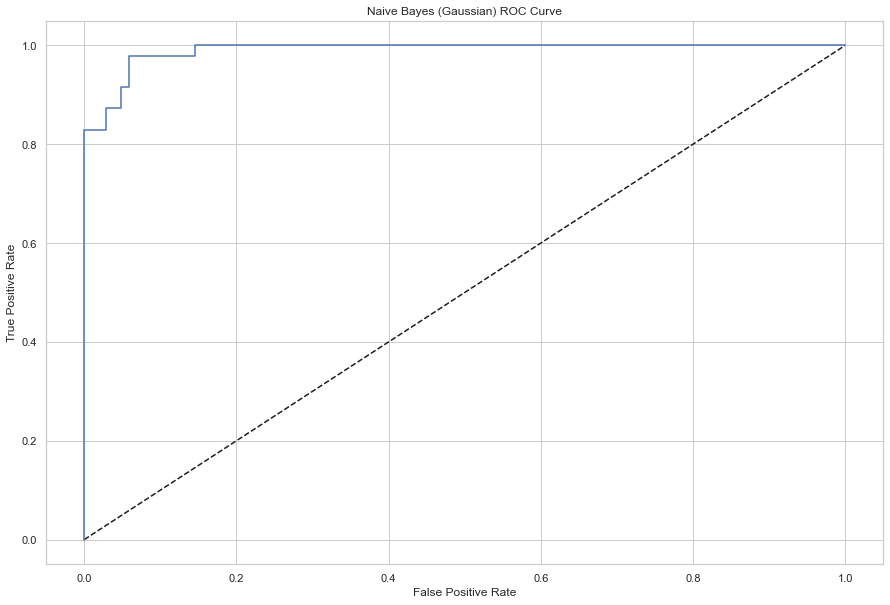

In [210]:
plot_roc_curve('Naive Bayes (Gaussian)')

[0.1   0.325 0.55  0.775 1.   ]
[ 39 129 218 307 397]
[[0.97435897 1.         1.         1.         1.        ]
 [0.95348837 0.95348837 0.95348837 0.95348837 0.95348837]
 [0.9587156  0.96788991 0.94036697 0.94036697 0.94036697]
 [0.95439739 0.94462541 0.93485342 0.95439739 0.96091205]
 [0.93702771 0.9395466  0.92947103 0.94710327 0.94710327]]
[[0.88       0.83       0.90909091 0.76767677 0.75757576]
 [0.96       0.95       0.98989899 0.8989899  0.92929293]
 [0.96       0.93       0.96969697 0.91919192 0.93939394]
 [0.95       0.94       0.96969697 0.91919192 0.93939394]
 [0.94       0.93       0.95959596 0.90909091 0.93939394]]
[0.99487179 0.95348837 0.94954128 0.94983713 0.94005038]


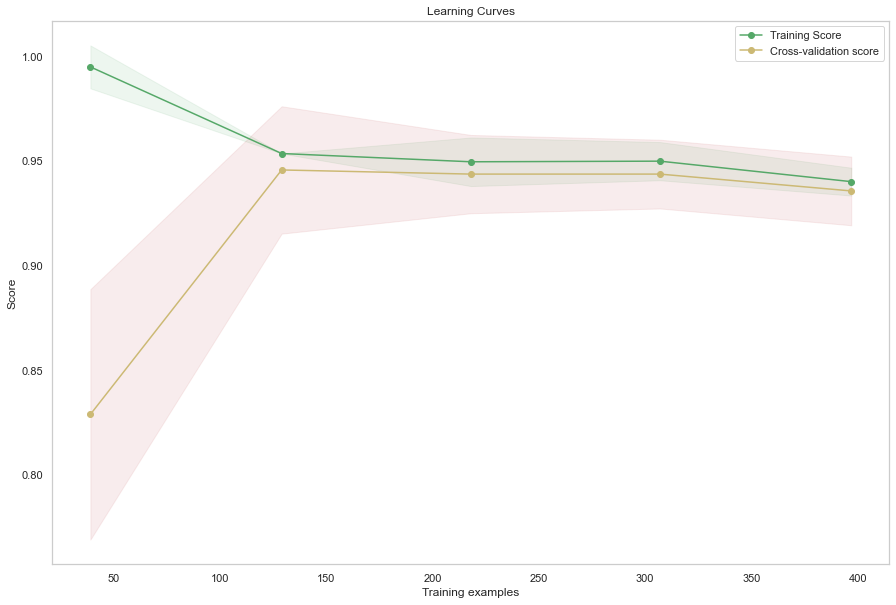

In [211]:
plot_learning_curve(X, y, gauss, 5)

## Naive Bayes (Bernoulli):

In [212]:
bern = BernoulliNB()
bern.fit(X_train, y_train)
y_pred = bern.predict(X_test)
bern_MSE = mean_squared_error(y_pred,y_test)
print('Training Score:', accuracy_score(y_train, bern.predict(X_train)))
bern_acc = accuracy_score(y_test, bern.predict(X_test))
print('Testing Accuracy:', bern_acc)

bern_score = bern.score(X_test, y_test)
print('Score:', bern_score)
print('MSE:', bern_MSE)

Training Score: 0.8962536023054755
Testing Accuracy: 0.9333333333333333
Score: 0.9333333333333333
MSE: 0.06666666666666667


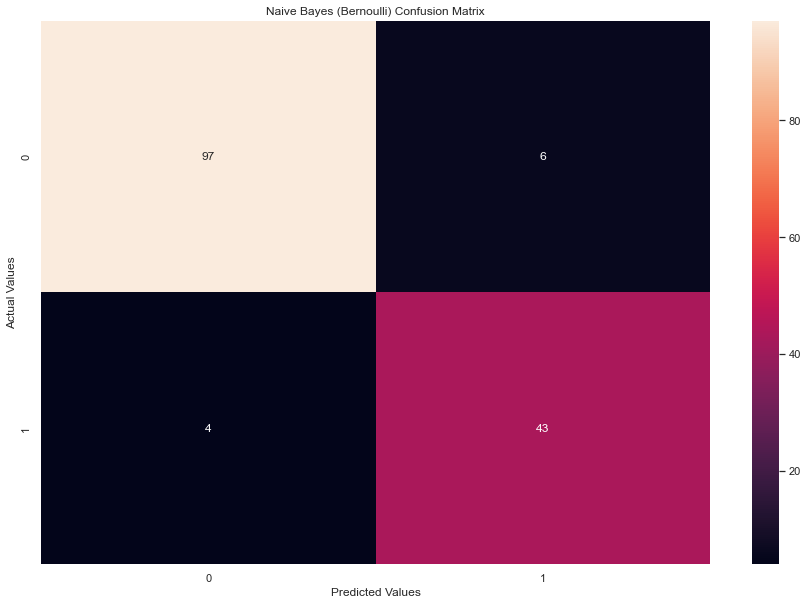

In [213]:
plot_confusion_matrix('Naive Bayes (Bernoulli)')

In [214]:
y_pred_probs = bern.predict_proba(X_test)[:,1]
print('The y Prediciton Prob is:', y_pred_probs[0])
print('The AUC Score is:',roc_auc_score(y_test, y_pred_probs))

The y Prediciton Prob is: 1.6104682203404164e-05
The AUC Score is: 0.9801693864903945


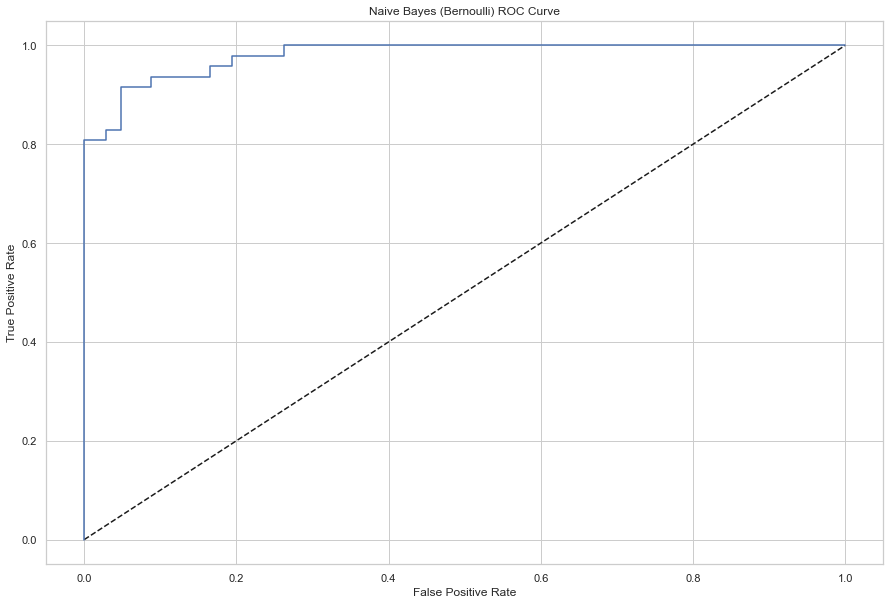

In [215]:
plot_roc_curve('Naive Bayes (Bernoulli)')

[0.1   0.325 0.55  0.775 1.   ]
[ 39 129 218 307 397]
[[0.87179487 0.84615385 0.84615385 0.84615385 0.84615385]
 [0.58914729 0.49612403 0.50387597 0.50387597 0.50387597]
 [0.56422018 0.56422018 0.6146789  0.54587156 0.53669725]
 [0.63517915 0.63517915 0.63517915 0.6514658  0.59283388]
 [0.6675063  0.6675063  0.67002519 0.67002519 0.6675063 ]]
[[0.35       0.35       0.33333333 0.34343434 0.35353535]
 [0.35       0.35       0.33333333 0.34343434 0.35353535]
 [0.67       0.67       0.66666667 0.66666667 0.66666667]
 [0.67       0.67       0.66666667 0.66666667 0.66666667]
 [0.67       0.67       0.66666667 0.66666667 0.66666667]]
[0.85128205 0.51937984 0.56513761 0.62996743 0.66851385]


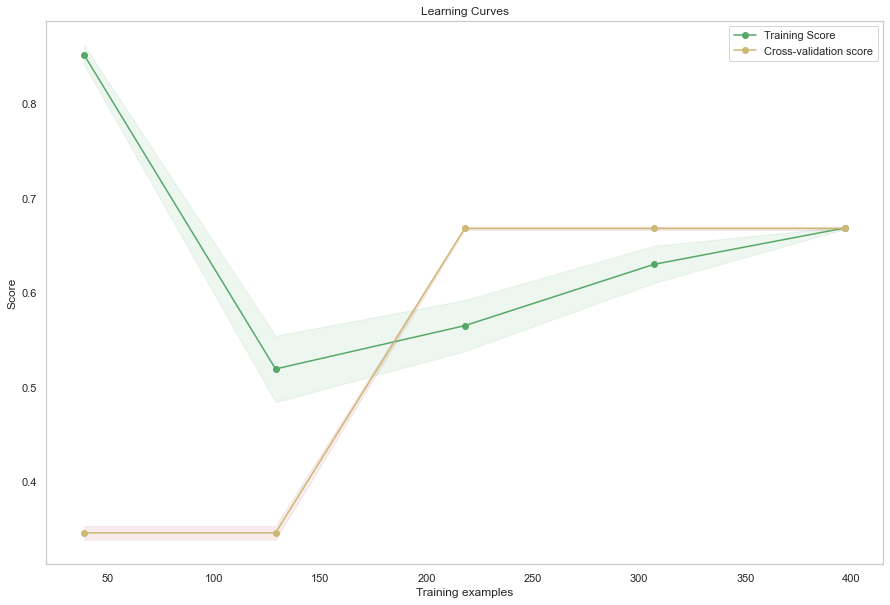

In [216]:
plot_learning_curve(X, y, bern, 5)

In [217]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       103
           1       0.88      0.91      0.90        47

    accuracy                           0.93       150
   macro avg       0.92      0.93      0.92       150
weighted avg       0.93      0.93      0.93       150



## Model Selection:

In [218]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Stochastic Gradient Descent', 'Decision Tree Classifier', 'Random Forest Classifier', 'XG Boost', 'Gradient Boosting Classifier', 'SVC', 'Naive Bayes (Gaussian)', 'Naive Bayes (Bernoulli)'],
    'Score': [lr_score, knn_score, sgd_score, dtc_score, rfc_score, xgb_score, gbc_score, svc_score, gauss_score, bern_score]
 })
models = models.sort_values('Score', ascending = False)
models

,Model,Score
7,SVC,0.986667
0,Logistic Regression,0.980000
5,XG Boost,0.980000
6,Gradient Boosting Classifier,0.980000
4,Random Forest Classifier,0.973333
2,Stochastic Gradient Descent,0.966667
1,KNN,0.953333
3,Decision Tree Classifier,0.940000
8,Naive Bayes (Gaussian),0.933333
9,Naive Bayes (Bernoulli),0.933333


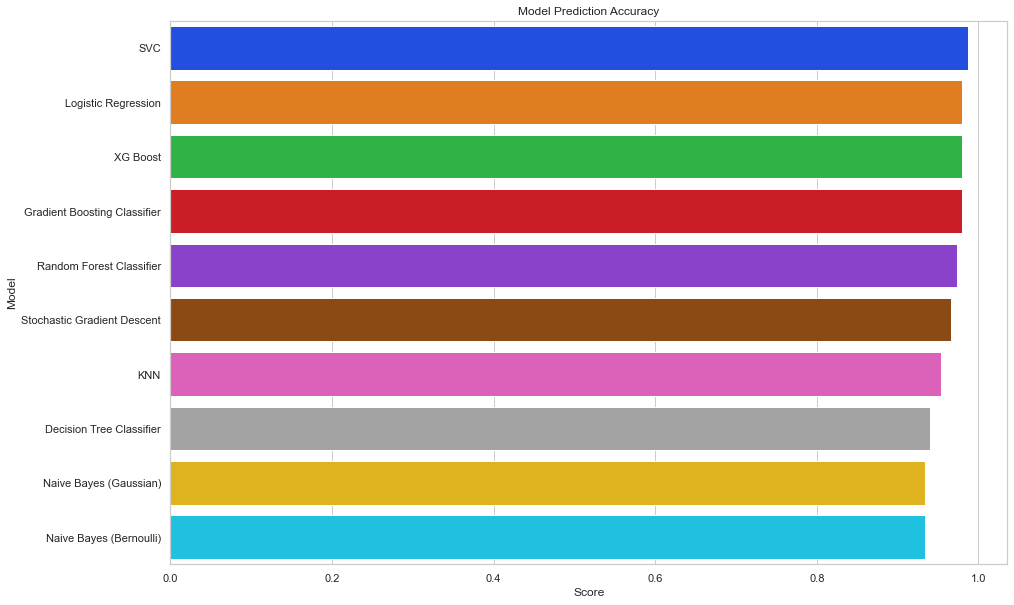

In [219]:
plt.figure(figsize = (15,10))
sns.barplot(data = models, 
            y = 'Model', 
            x = 'Score',
            palette = 'bright')
plt.title('Model Prediction Accuracy')
plt.show()

In [220]:
models1 = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Stochastic Gradient Descent', 'Decision Tree Classifier', 'Random Forest Classifier', 'XG Boost', 'Gradient Boosting Classifier', 'SVC', 'Naive Bayes (Gaussian)', 'Naive Bayes (Bernoulli)'],
    'MSE': [lr_MSE, knn_MSE, sgd_MSE, dtc_MSE, rfc_MSE, xgb_MSE, gbc_MSE, svc_MSE, gauss_MSE, bern_MSE]
 })
models1 = models1.sort_values('MSE', ascending = True)
models1

,Model,MSE
7,SVC,0.013333
0,Logistic Regression,0.020000
5,XG Boost,0.020000
6,Gradient Boosting Classifier,0.020000
4,Random Forest Classifier,0.026667
2,Stochastic Gradient Descent,0.033333
1,KNN,0.046667
3,Decision Tree Classifier,0.060000
8,Naive Bayes (Gaussian),0.066667
9,Naive Bayes (Bernoulli),0.066667


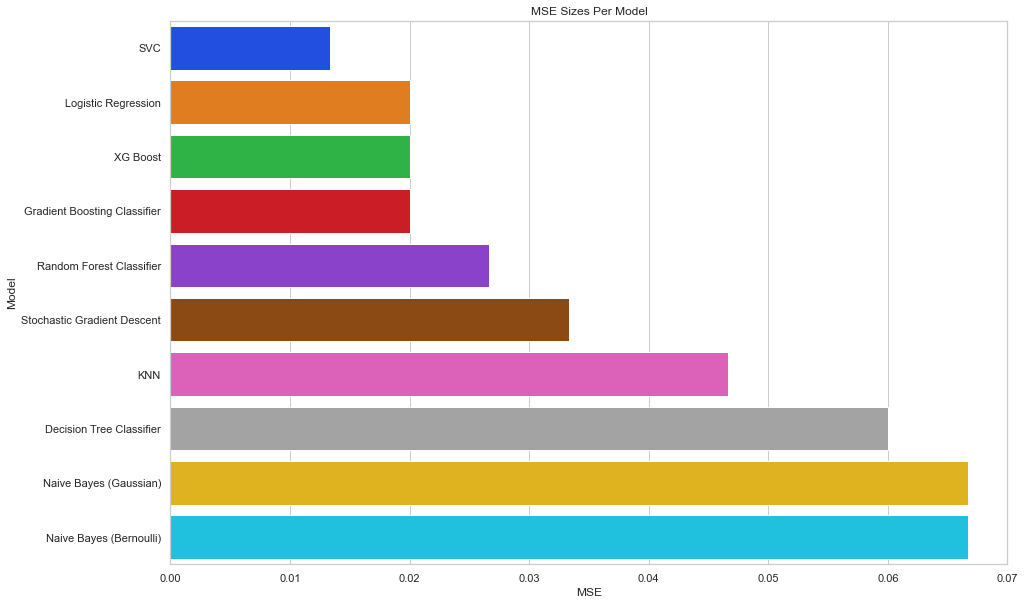

In [221]:
plt.figure(figsize = (15,10))
sns.barplot(data = models1, 
            y = 'Model', 
            x = 'MSE',
            palette = 'bright')
plt.title('MSE Sizes Per Model')
plt.show()